# Test python for balanced dgp

In [71]:
import os
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt

from utils_properties import BalanceTable

## Data



In [80]:
# load data from csv
dgp_name = "drug"

df_train = pd.read_csv(f"results/{dgp_name}_train.csv")
df_test = pd.read_csv(f"results/{dgp_name}_test.csv")

print(f"percentage of treated in train set: {df_train['D'].mean()}")
print(f"percentage of treated in test set: {df_test['D'].mean()}")

df_train.head()

percentage of treated in train set: 0.62
percentage of treated in test set: 0.604


,X1,X2,X3,D,Y,m_oracle,treatment_effect,m_hat,m_calibrated,m_oracle_ate_weights,m_oracle_att_weights,m_hat_ate_weights,m_hat_att_weights,m_calibrated_ate_weights,m_calibrated_att_weights
0,0.0,56.356133,0.460435,1,5,0.822556,-1,0.875,1.0,1.215723,1.000000,1.142857,1.000000,1.0,1.000000e+00
1,1.0,57.711232,0.855114,1,6,0.906115,-1,0.965,1.0,1.103612,1.000000,1.036269,1.000000,1.0,1.000000e+00
2,0.0,43.881830,0.511292,0,8,0.488151,-1,0.330,0.0,1.953700,0.953700,1.492537,0.492537,1.0,1.000000e-12
3,0.0,46.555424,0.267957,0,4,0.502323,-1,0.180,0.0,2.009336,1.009336,1.219512,0.219512,1.0,1.000000e-12
4,1.0,50.355966,0.613813,0,3,0.697256,-1,0.180,0.0,3.303123,2.303123,1.219512,0.219512,1.0,1.000000e-12


## ATE

### Balance Tables

In [81]:
covs = ["X1", "X2", "X3", "Y"]

bal_table_train = BalanceTable(
    df=df_train,
    cov_cols=covs,
    treatment="D",
    weights=df_train["m_oracle_ate_weights"],
)

bal_table_test = BalanceTable(
    df=df_test,
    cov_cols=covs,
    treatment="D",
    weights=df_test["m_oracle_ate_weights"],
)

print(bal_table_train)
print(bal_table_test)

Effective Sample Size:
            Control  Treated
Unadjusted   380.00   620.00
Adjusted     270.21   547.31

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1   Binary     -0.0206   -0.0120
1        X2  Contin.      0.3353   -0.0497
2        X3  Contin.      0.5393   -0.0069
3         Y  Contin.     -0.4017   -0.6013
Effective Sample Size:
            Control  Treated
Unadjusted   396.00   604.00
Adjusted     293.56   527.94

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1   Binary     -0.0169   -0.0283
1        X2  Contin.      0.4248    0.0944
2        X3  Contin.      0.5874    0.0642
3         Y  Contin.     -0.1862   -0.2993


### Love Plots

In [82]:
ate_plots_train = []
ate_plots_test = []

weights_list = ["m_oracle_ate_weights", "m_hat_ate_weights", "m_calibrated_ate_weights"]

for i, weights in enumerate(weights_list):
    bal_table_train = BalanceTable(
        df=df_train,
        cov_cols=covs,
        treatment="D",
        weights=df_train[weights],
    )

    bal_table_test = BalanceTable(
        df=df_test,
        cov_cols=covs,
        treatment="D",
        weights=df_test[weights],
    )

    print(f"Train - weights: {weights}")
    print(bal_table_train)
    print(f"Test - weights: {weights}")
    print(bal_table_test)

    p_train = bal_table_train.love_plot() + \
              p9.ggtitle(f"Train - {weights}")
    
    p_test = bal_table_test.love_plot() + \
             p9.ggtitle(f"Test - {weights}")

    ate_plots_train.append(p_train)
    ate_plots_test.append(p_test)

Train - weights: m_oracle_ate_weights
Effective Sample Size:
            Control  Treated
Unadjusted   380.00   620.00
Adjusted     270.21   547.31

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1   Binary     -0.0206   -0.0120
1        X2  Contin.      0.3353   -0.0497
2        X3  Contin.      0.5393   -0.0069
3         Y  Contin.     -0.4017   -0.6013
Test - weights: m_oracle_ate_weights
Effective Sample Size:
            Control  Treated
Unadjusted   396.00   604.00
Adjusted     293.56   527.94

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1   Binary     -0.0169   -0.0283
1        X2  Contin.      0.4248    0.0944
2        X3  Contin.      0.5874    0.0642
3         Y  Contin.     -0.1862   -0.2993
Train - weights: m_hat_ate_weights
Effective Sample Size:
            Control  Treated
Unadjusted   380.00    620.0
Adjusted     374.43    611.7

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1   Binary     -0.0206   -0.0175
1       

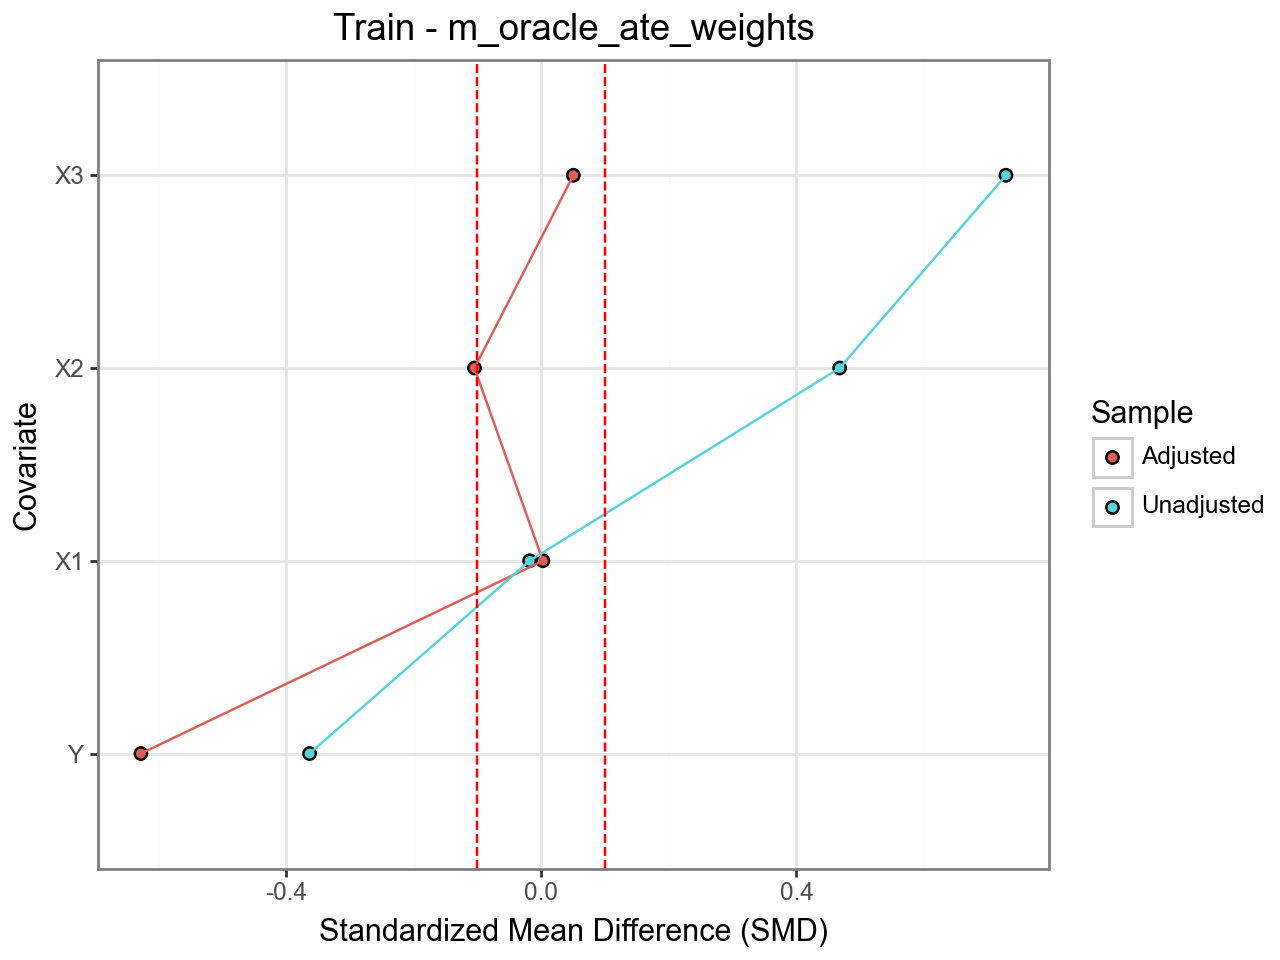

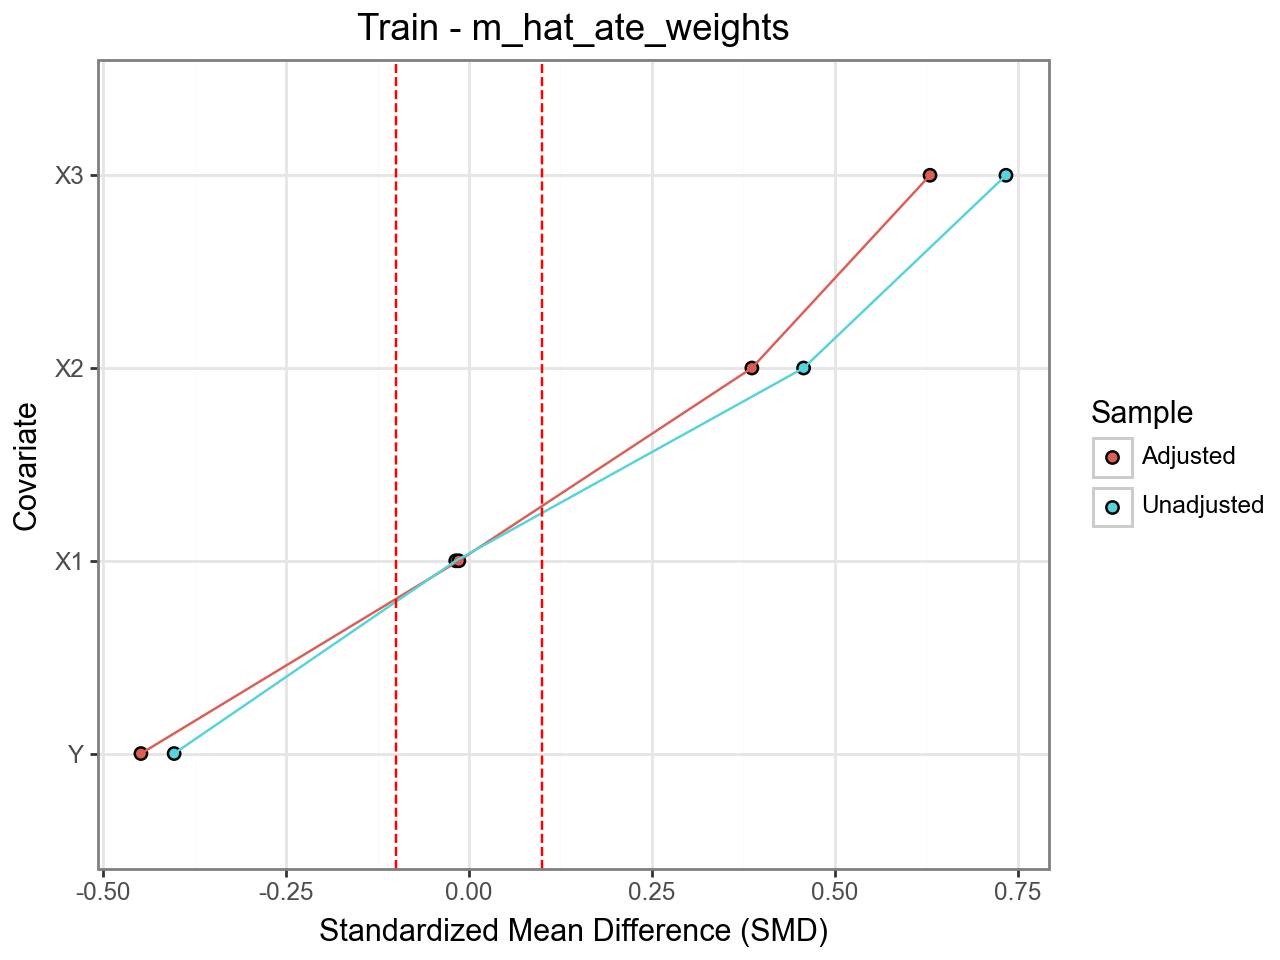

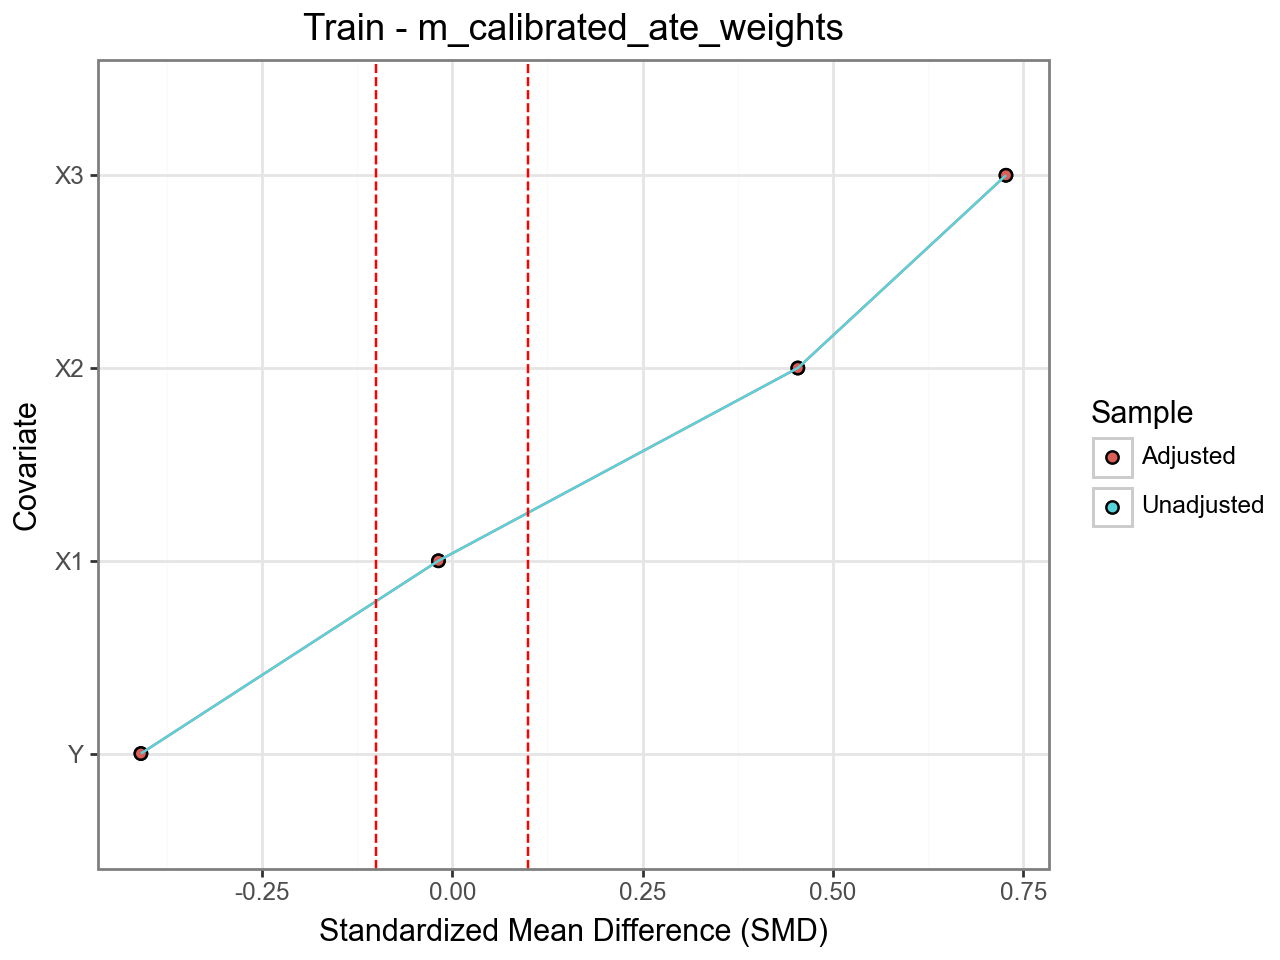

In [75]:
for i, p in enumerate(ate_plots_train):
    p.show()

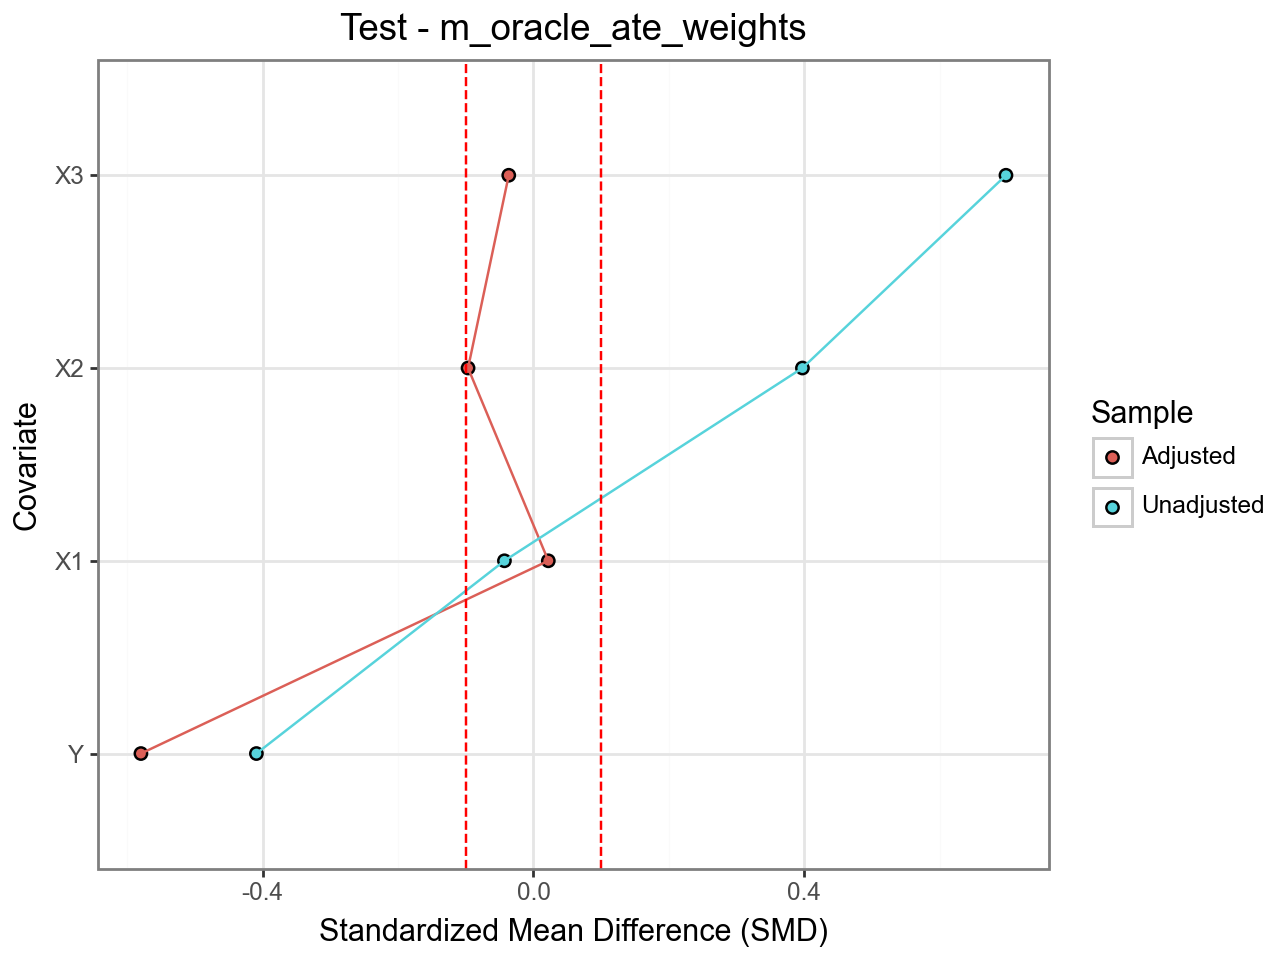

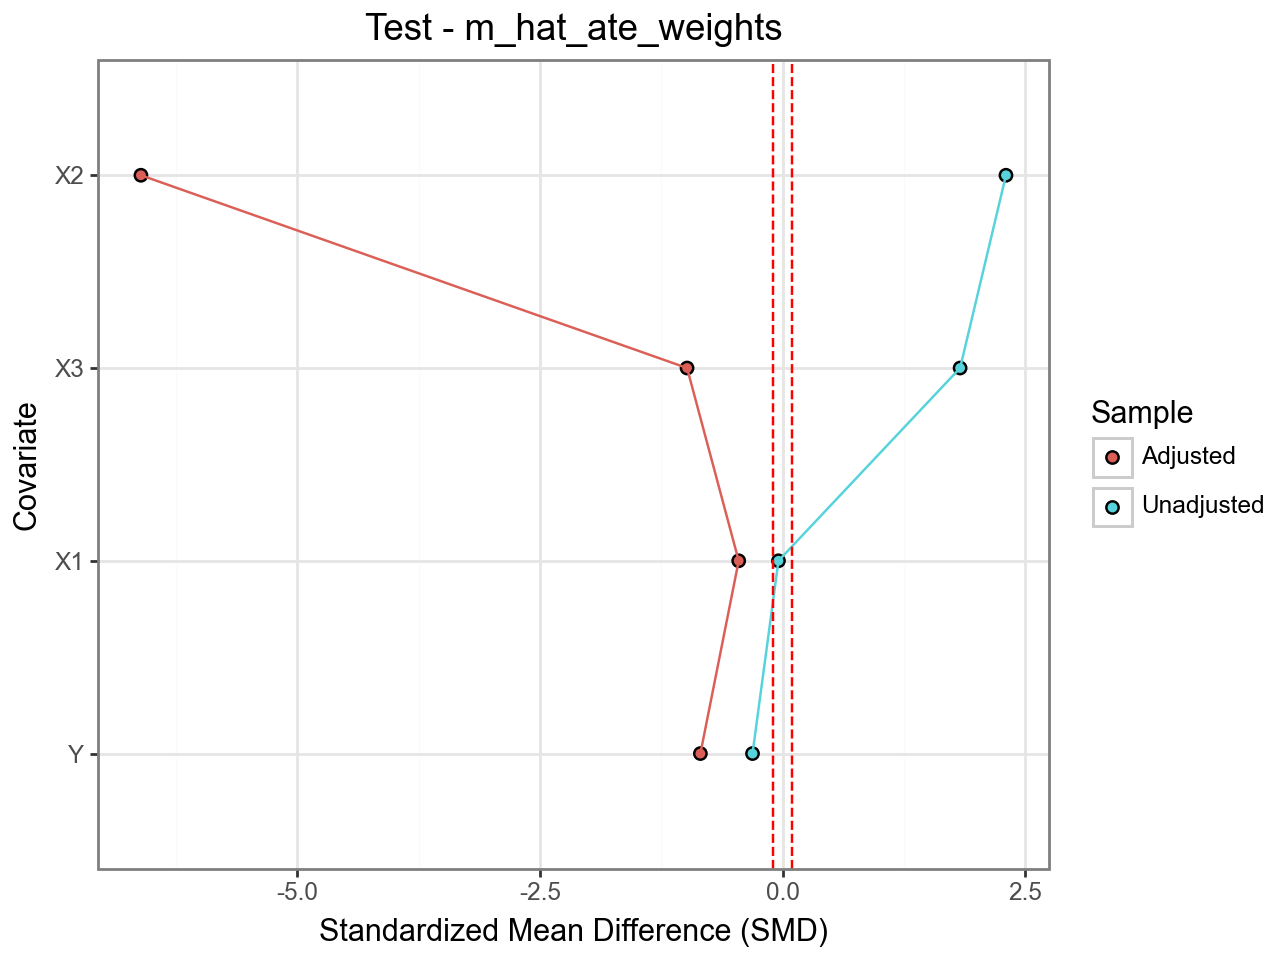

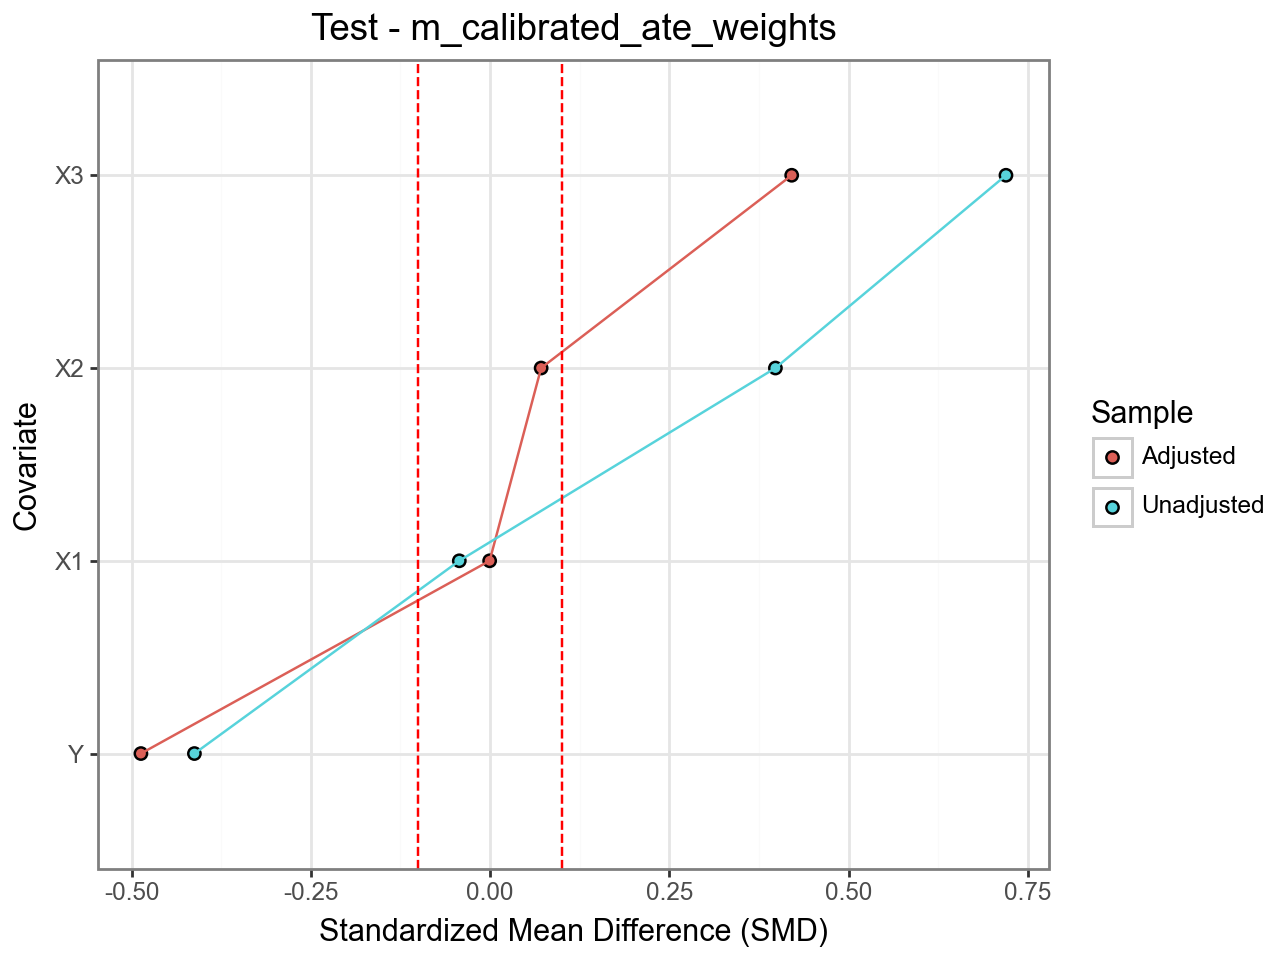

In [8]:
for i, p in enumerate(ate_plots_test):
    p.show()

## ATT

### Balance Tables

In [83]:
covs = ["X1", "X2", "X3", "Y"]

bal_table_train = BalanceTable(
    df=df_train,
    cov_cols=covs,
    treatment="D",
    weights=df_train["m_oracle_att_weights"],
)

bal_table_test = BalanceTable(
    df=df_test,
    cov_cols=covs,
    treatment="D",
    weights=df_test["m_oracle_att_weights"],
)

print(bal_table_train)
print(bal_table_test)

Effective Sample Size:
            Control  Treated
Unadjusted   380.00    620.0
Adjusted     184.02    620.0

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1   Binary     -0.0206   -0.0209
1        X2  Contin.      0.3345   -0.0425
2        X3  Contin.      0.5347   -0.0072
3         Y  Contin.     -0.3869   -0.6281
Effective Sample Size:
            Control  Treated
Unadjusted   396.00    604.0
Adjusted     198.19    604.0

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1   Binary     -0.0169   -0.0386
1        X2  Contin.      0.4176    0.1281
2        X3  Contin.      0.5767    0.0497
3         Y  Contin.     -0.1866   -0.2830


### Love Plots

In [84]:
att_plots_train = []
att_plots_test = []

weights_list = ["m_oracle_att_weights", "m_hat_att_weights", "m_calibrated_att_weights"]

for i, weights in enumerate(weights_list):
    bal_table_train = BalanceTable(
        df=df_train,
        cov_cols=covs,
        treatment="D",
        weights=df_train[weights],
    )

    bal_table_test = BalanceTable(
        df=df_test,
        cov_cols=covs,
        treatment="D",
        weights=df_test[weights],
    )

    print(bal_table_train)
    print(bal_table_test)

    p_train = bal_table_train.love_plot() + \
              p9.ggtitle(f"Train - {weights}")
    
    p_test = bal_table_test.love_plot() + \
             p9.ggtitle(f"Test - {weights}")

    att_plots_train.append(p_train)
    att_plots_test.append(p_test)

Effective Sample Size:
            Control  Treated
Unadjusted   380.00    620.0
Adjusted     184.02    620.0

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1   Binary     -0.0206   -0.0209
1        X2  Contin.      0.3345   -0.0425
2        X3  Contin.      0.5347   -0.0072
3         Y  Contin.     -0.3869   -0.6281
Effective Sample Size:
            Control  Treated
Unadjusted   396.00    604.0
Adjusted     198.19    604.0

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1   Binary     -0.0169   -0.0386
1        X2  Contin.      0.4176    0.1281
2        X3  Contin.      0.5767    0.0497
3         Y  Contin.     -0.1866   -0.2830
Effective Sample Size:
            Control  Treated
Unadjusted    380.0    620.0
Adjusted      287.3    620.0

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1   Binary     -0.0206   -0.0198
1        X2  Contin.      0.3168    0.1700
2        X3  Contin.      0.5317    0.3291
3         Y  Contin.     -0.4638

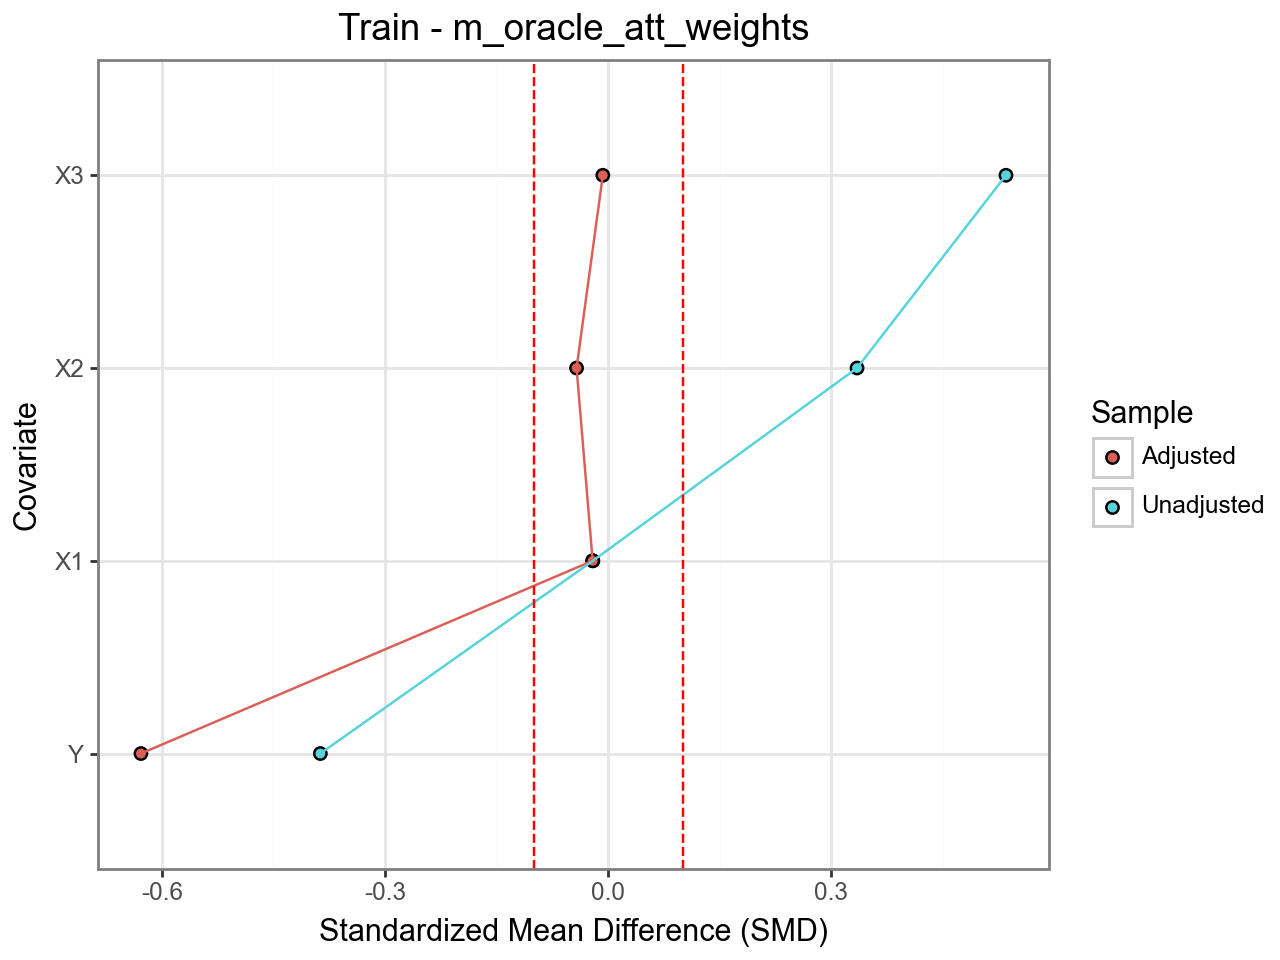

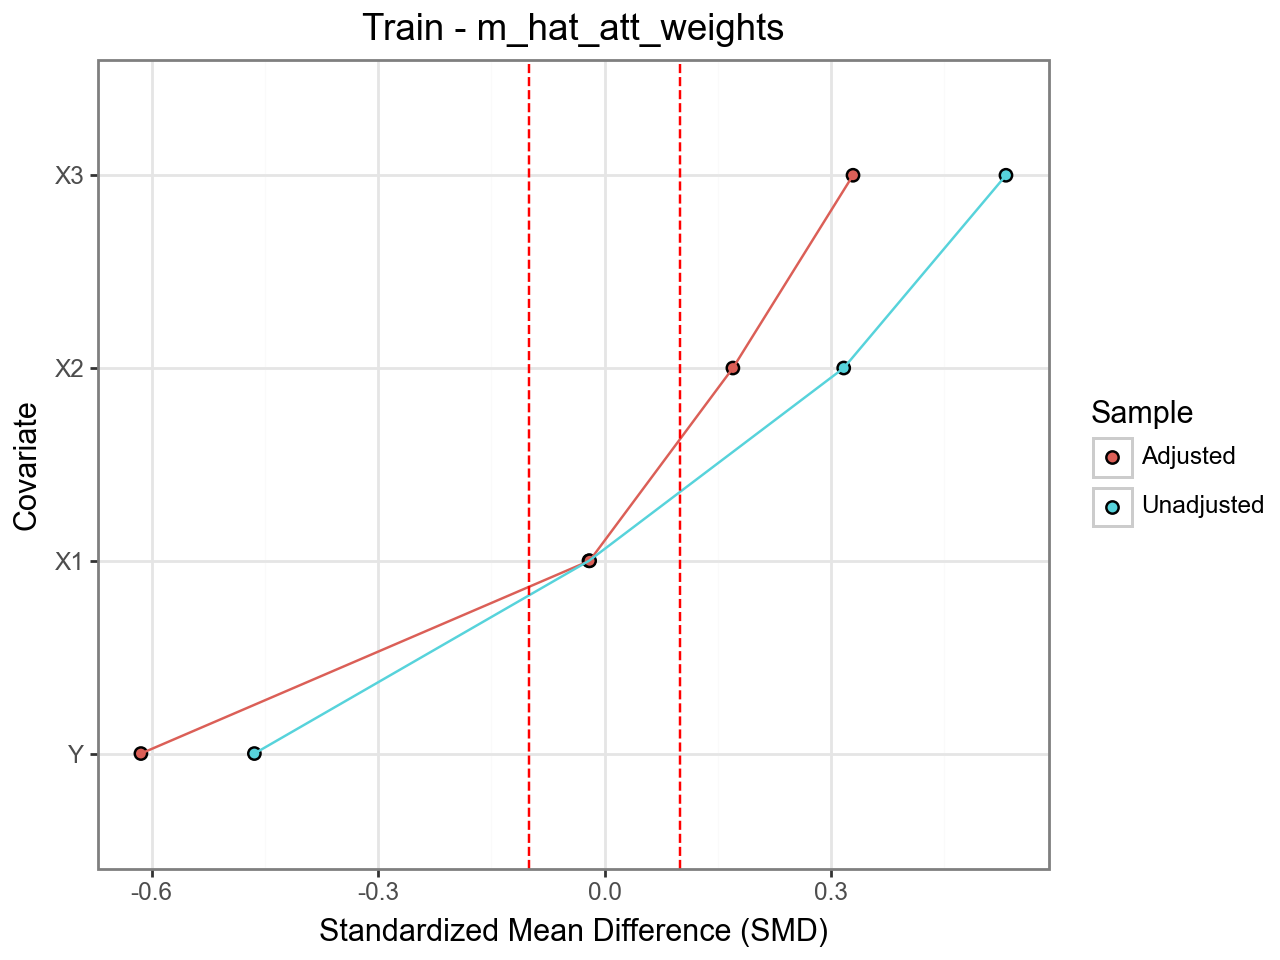

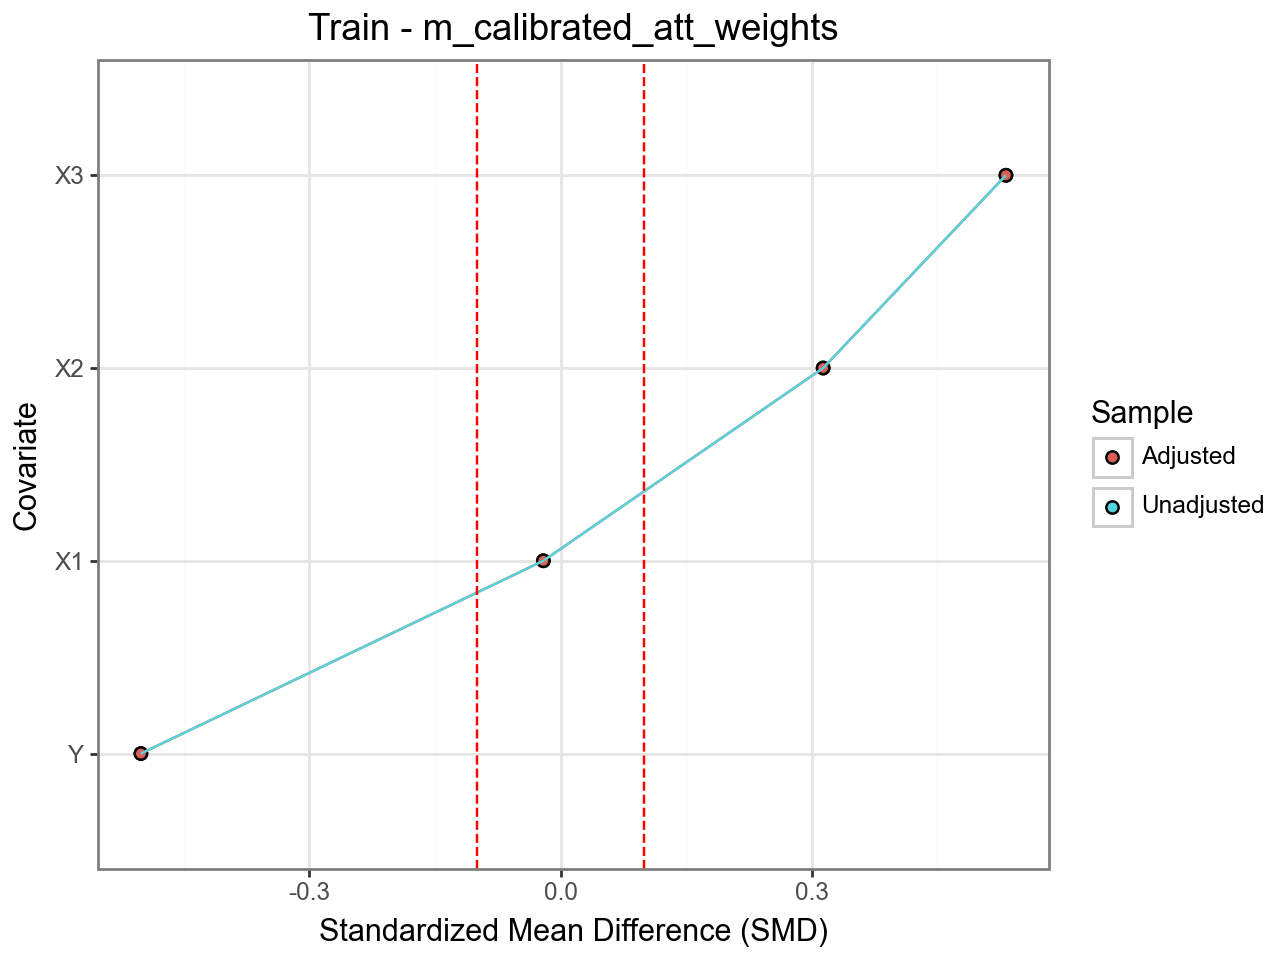

In [85]:
for i, p in enumerate(att_plots_train):
    p.show()

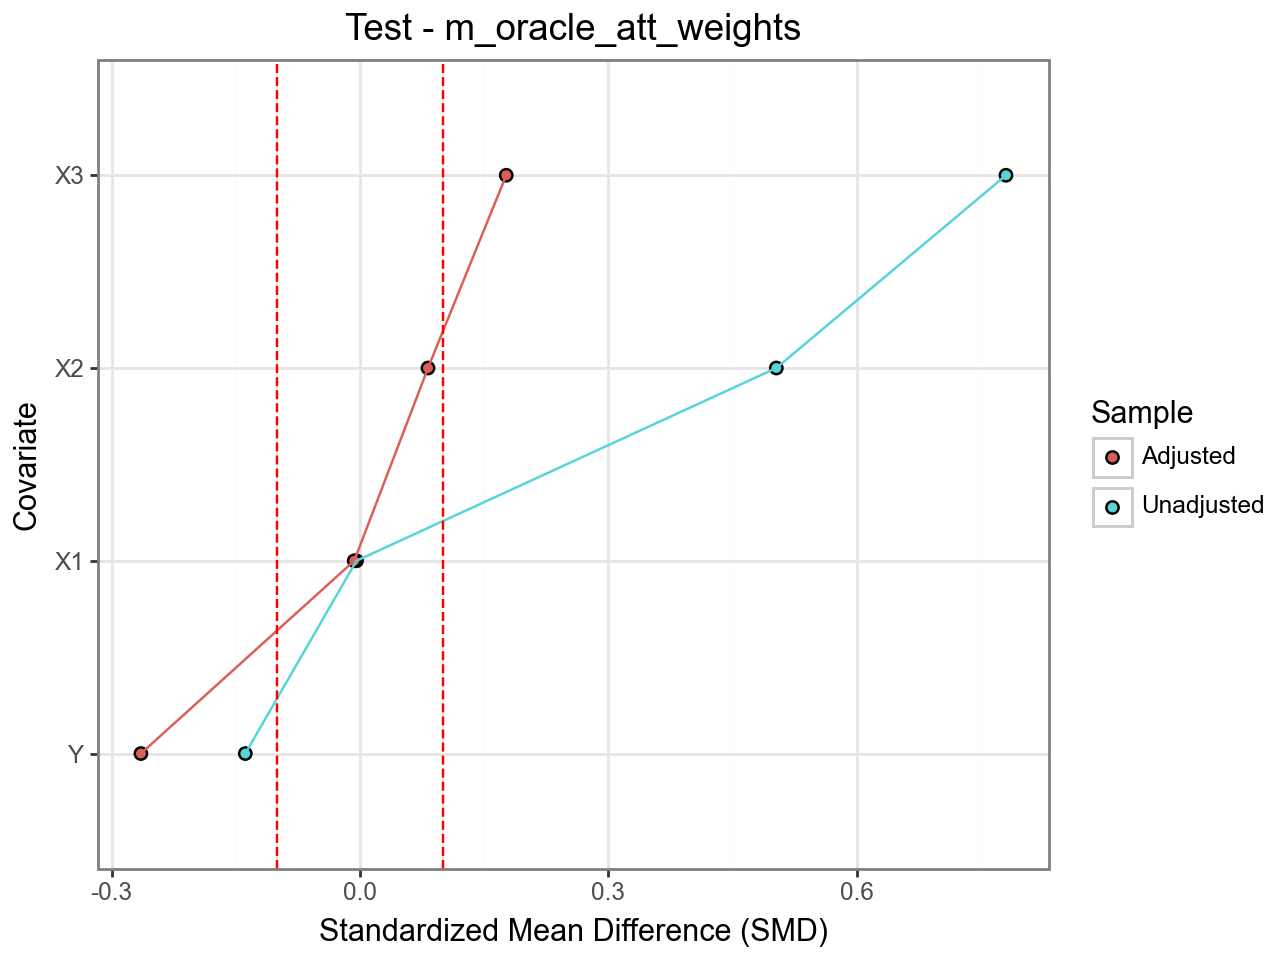

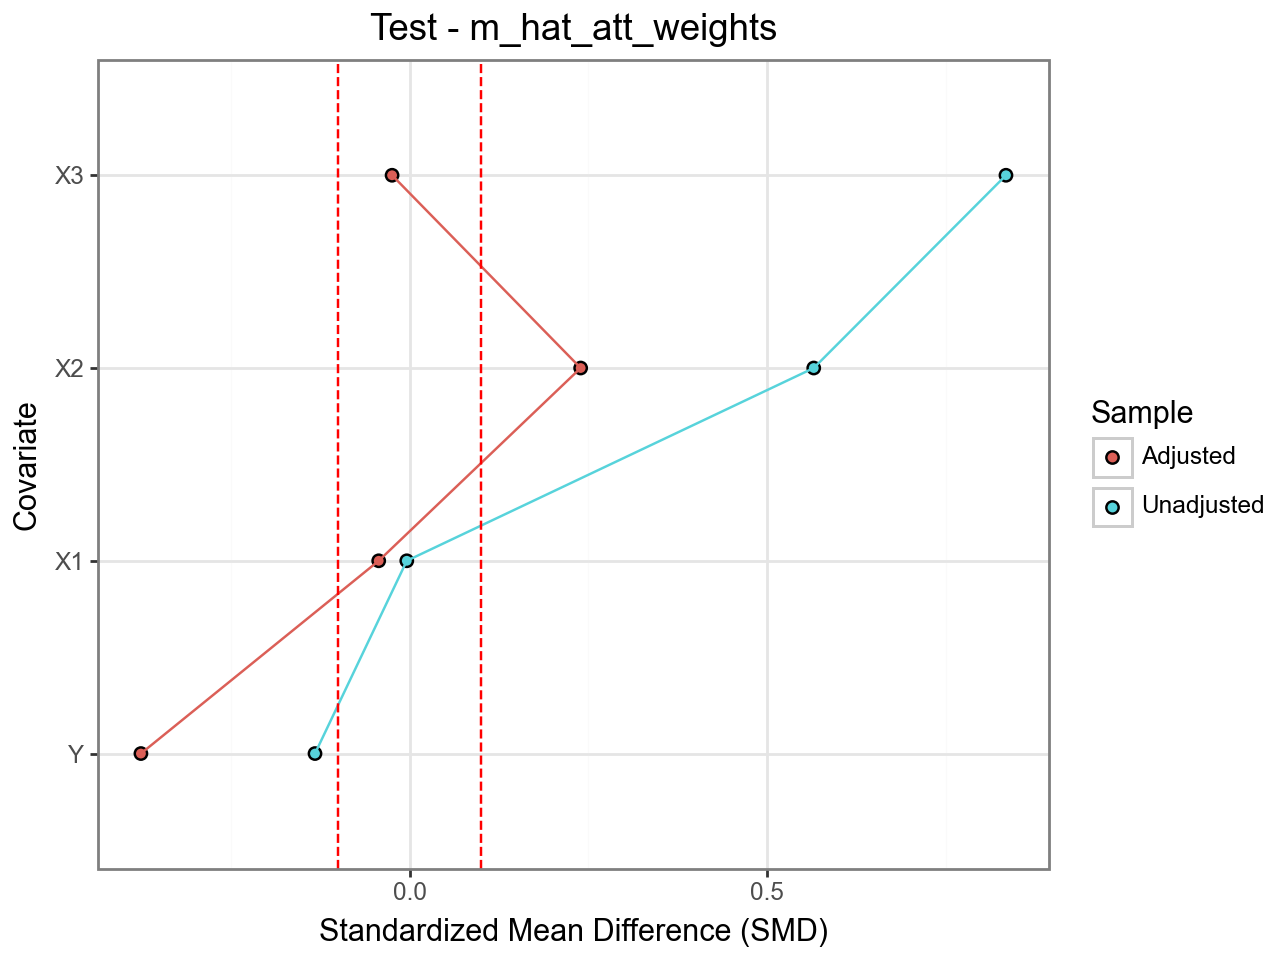

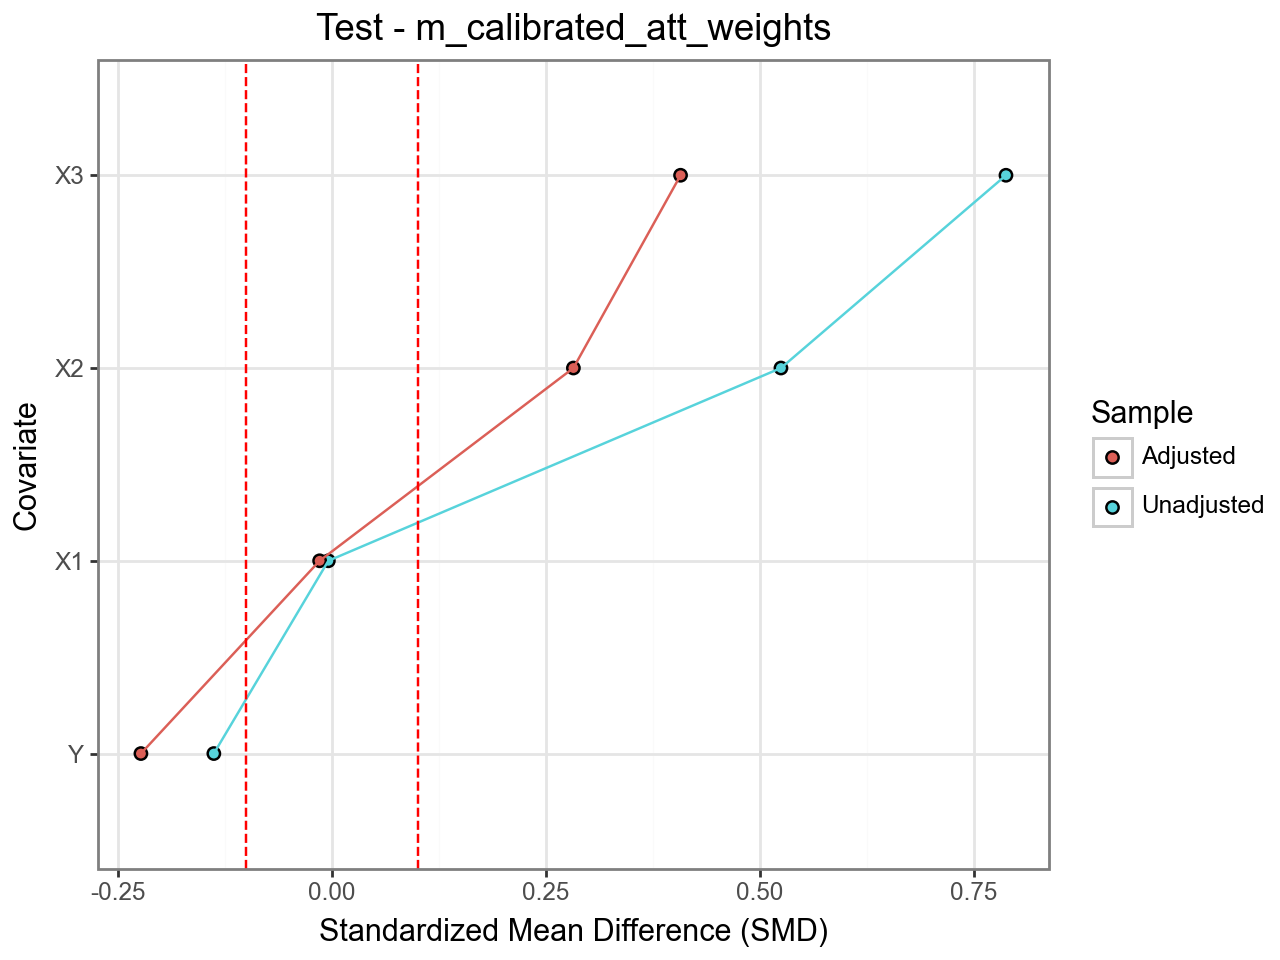

In [12]:
for i, p in enumerate(att_plots_test):
    p.show()

## Additional Balance plots

c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


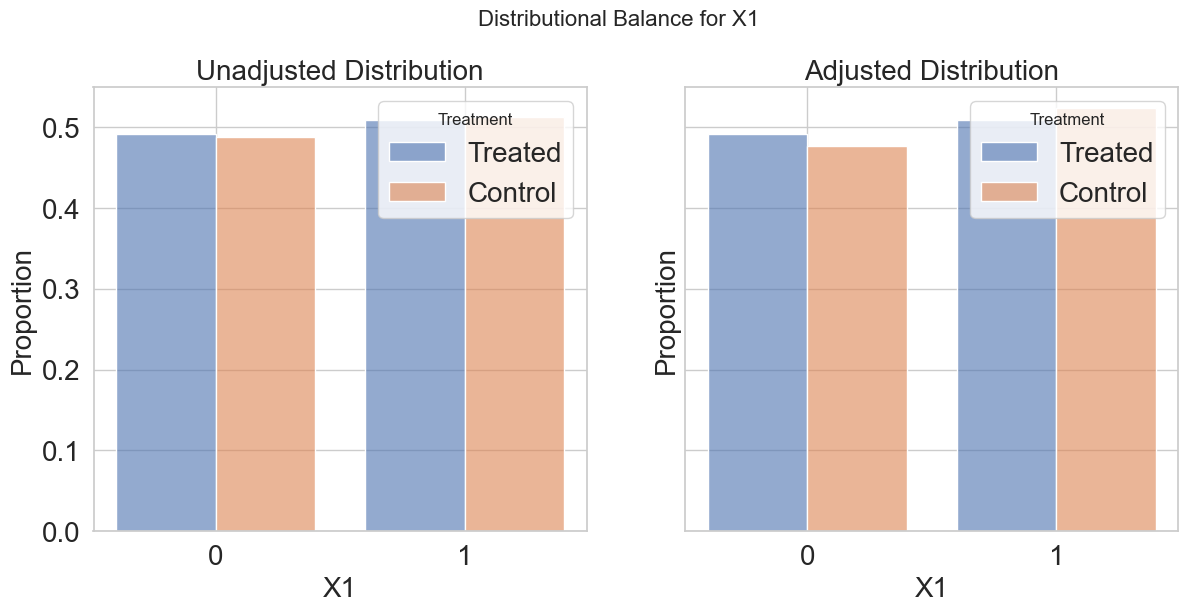

In [29]:
g = bal_table_test.balance_plot(covariate="X1", n_bins=15)
plt.show()

c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


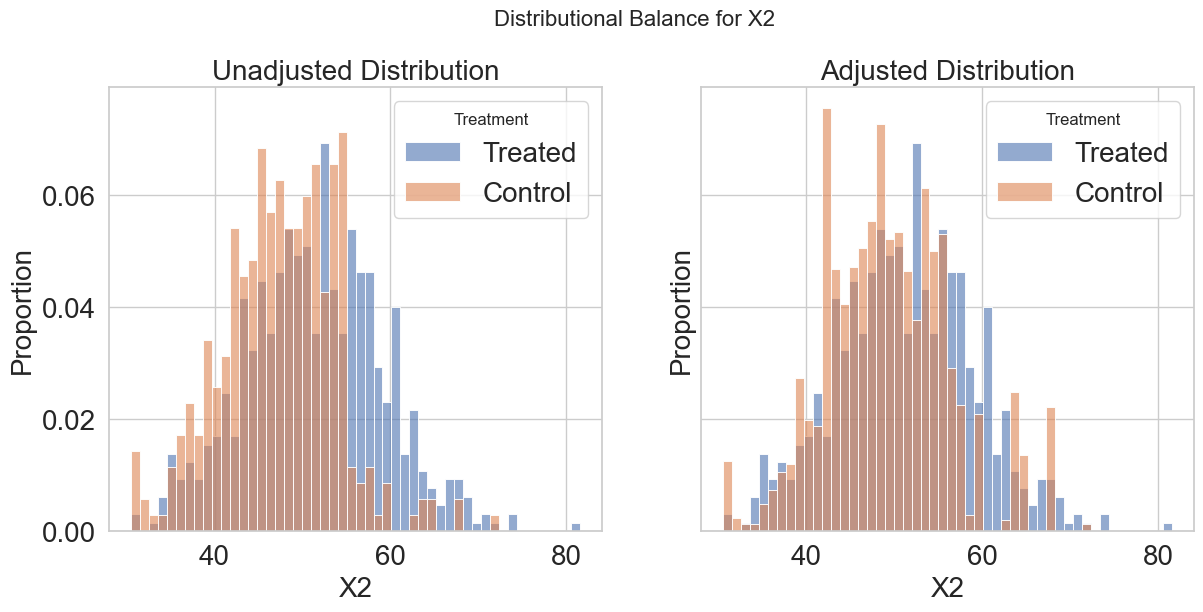

In [30]:
g = bal_table_test.balance_plot(covariate="X2", n_bins=50)
plt.show()

c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


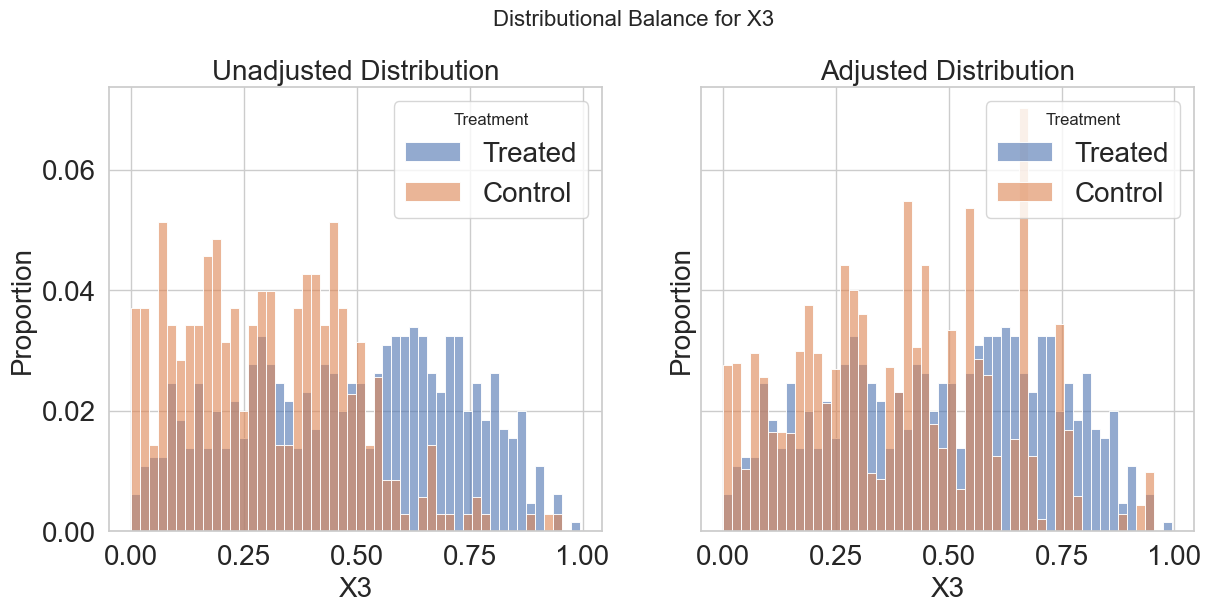

In [31]:
g = bal_table_test.balance_plot(covariate="X3", n_bins=50)
plt.show()

## Propensity Score Balance

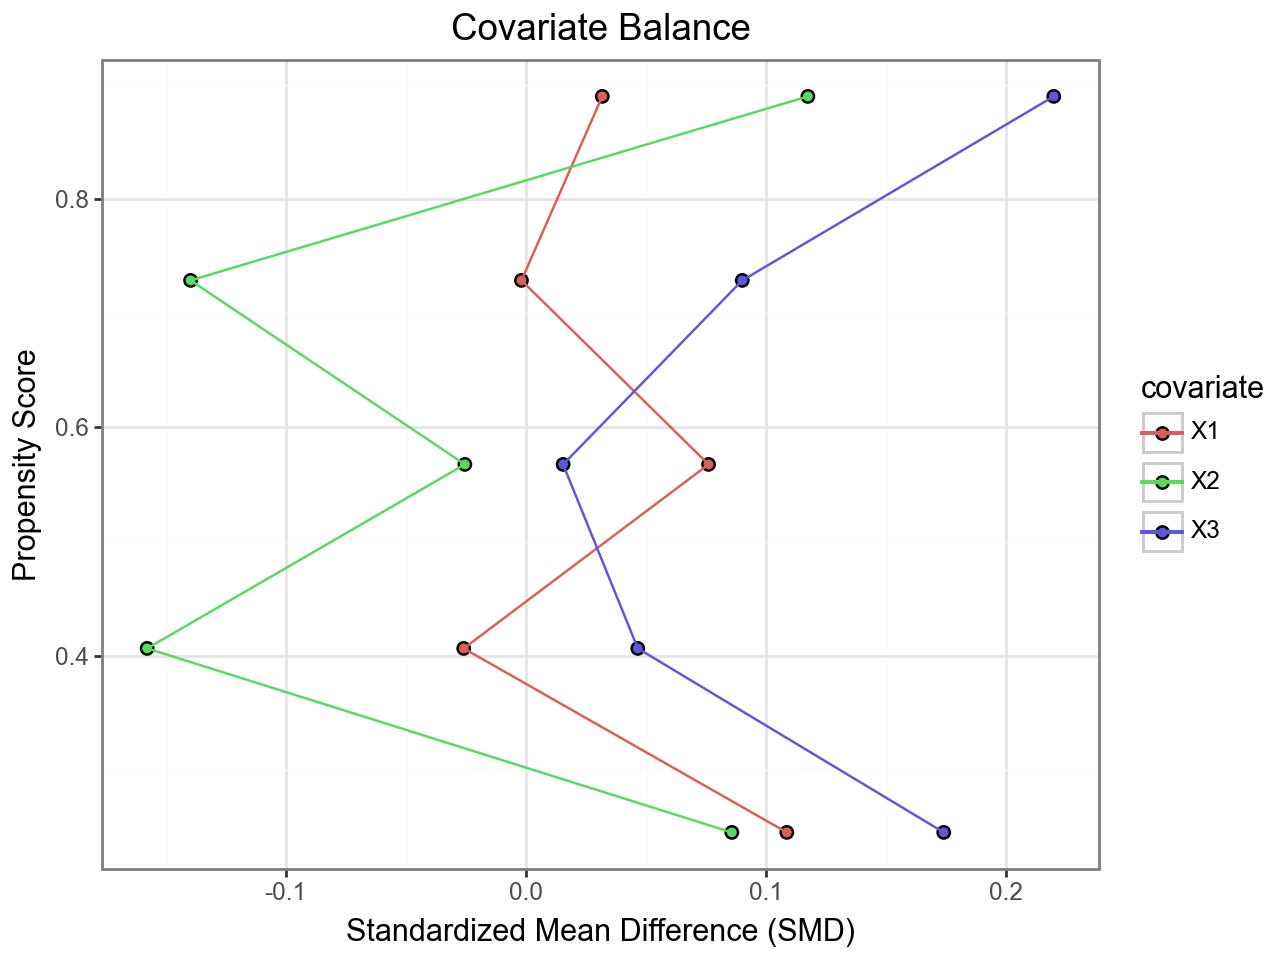

In [32]:
g = bal_table_test.plot_prop_balance(propensity_score=df_test["m_oracle"], covs=["X1", "X2", "X3"], n_bins=5)
g

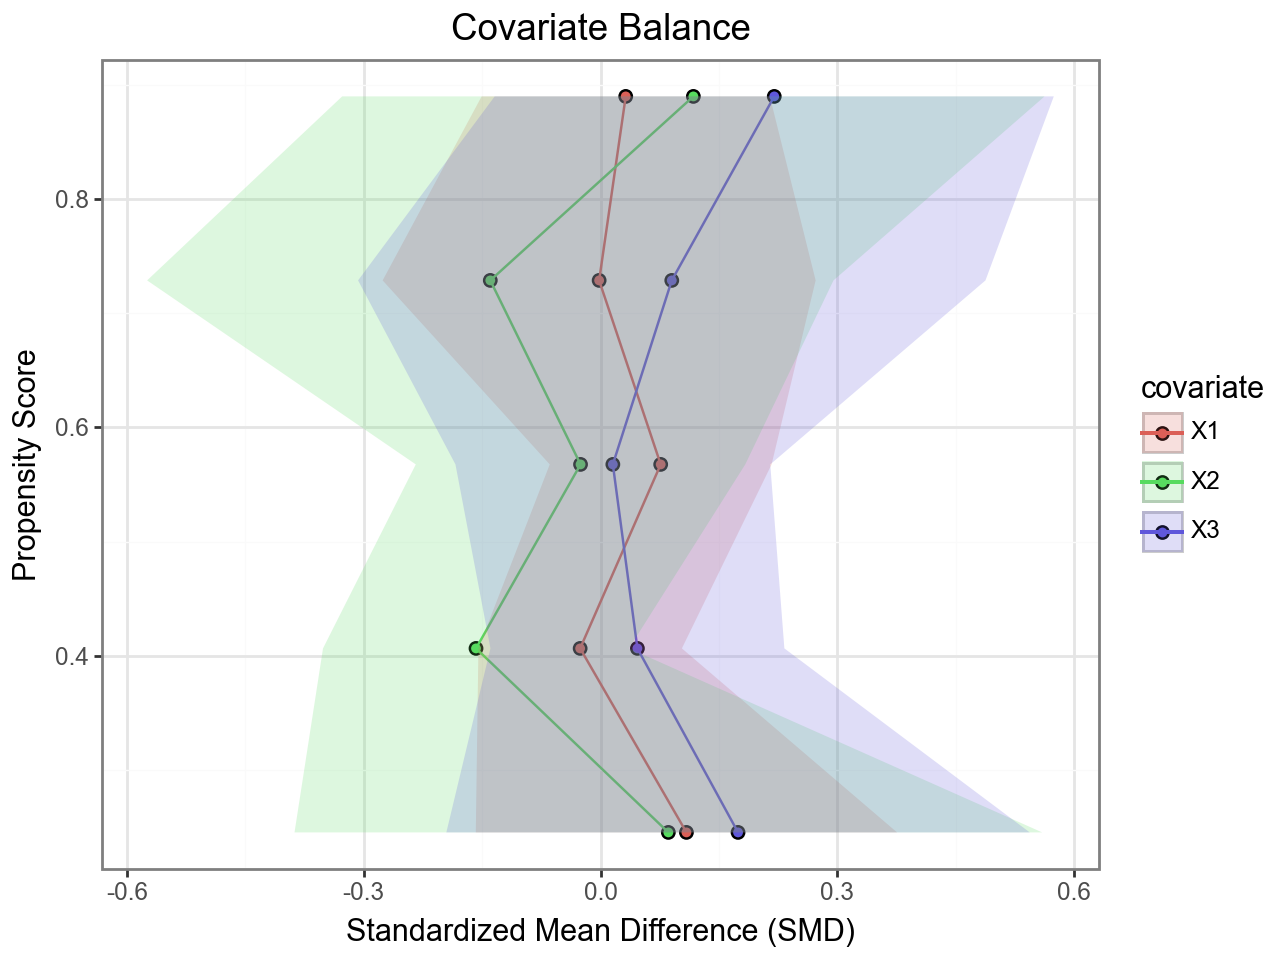

In [33]:
g = bal_table_test.plot_prop_balance(propensity_score=df_test["m_oracle"], covs=["X1", "X2", "X3"], n_bins=5, confint=True)
g

## Test other Balancing methods

In [86]:
# load data from csv
dgp_name = "drug_2"

df_train = pd.read_csv(f"results/{dgp_name}_train.csv")
df_test = pd.read_csv(f"results/{dgp_name}_test.csv")

print(f"percentage of treated in train set: {df_train['D'].mean()}")
print(f"percentage of treated in test set: {df_test['D'].mean()}")

df_train.head()

percentage of treated in train set: 0.62
percentage of treated in test set: 0.604


,X1,X2,X3,D,Y,m_oracle,m_glm_ate,m_glm_att,m_glm_ate_weights,m_glm_att_weights,...,m_ipt_ate_ate_weights,m_ipt_ate_att_weights,m_ebal_ate_ate_weights,m_ebal_ate_att_weights,m_glm_ate_ate_weights,m_glm_ate_att_weights,m_cbps_ate_ate_weights,m_cbps_ate_att_weights,m_optweight_ate_ate_weights,m_optweight_ate_att_weights
0,0.0,56.356133,0.460435,1,5,0.822556,0.692997,NaN,1.443007,1.000000,...,1.459290,1.000000,1.010101,1.000000,1.443007,1.000000,1.430799,1.000000,1.010101,1.000000
1,1.0,57.711232,0.855114,1,6,0.906115,0.853122,NaN,1.172165,1.000000,...,1.184159,1.000000,1.010101,1.000000,1.172165,1.000000,1.166110,1.000000,1.010101,1.000000
2,0.0,43.881830,0.511292,0,8,0.488151,0.621186,0.621186,2.639818,1.639818,...,2.647724,1.647724,1.089831,0.089831,2.639818,1.639818,2.663350,1.663350,1.196781,0.196781
3,0.0,46.555424,0.267957,0,4,0.502323,0.510210,0.510210,2.041692,1.041692,...,2.025327,1.025327,1.010101,0.010101,2.041692,1.041692,2.051581,1.051581,1.010101,0.010101
4,1.0,50.355966,0.613813,0,3,0.697256,0.723389,0.723389,3.615181,2.615181,...,3.668488,2.668488,1.465800,0.465800,3.615181,2.615181,3.664544,2.664544,1.498911,0.498911


In [87]:
from utils_properties import BalanceTable_2

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define covariates
covs = ['X1', 'X2', 'X3']

# Generate SMD data for each method
smd_data = []

weights_list = ["m_oracle_ate_weights", "m_hat_ate_weights", 
                "m_calibrated_ate_weights","m_ebal_ate_weights", 
                "m_ipt_ate_weights","m_cbps_ate_weights",
                "m_glm_ate_weights", "m_optweight_ate_weights"]

#weights_list = ["m_oracle_att_weights", "m_hat_att_weights", 
#                "m_calibrated_att_weights","m_ebal_att_weights", 
#                "m_ipt_att_weights","m_cbps_att_weights",
#                "m_glm_att_weights", "m_optweight_att_weights"]

methods = ["Oracle", "Hat", "Alg-5-full-sample-Iso", "EBAL", "IPT", "CBPS", "GLM", "Optweight"]

for weights, method in zip(weights_list, methods):
    bal_table_train = BalanceTable_2(
        df=df_train,
        cov_cols=covs,
        treatment="D",
        weights=df_train[weights],
        method=method
    )
    smd_data.append(bal_table_train.prepare_smd_data())

# Combine SMD data for plotting
combined_smd_data = pd.concat(smd_data)

# Replace inf values with NaN
combined_smd_data.replace([np.inf, -np.inf], np.nan, inplace=True)

c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)`

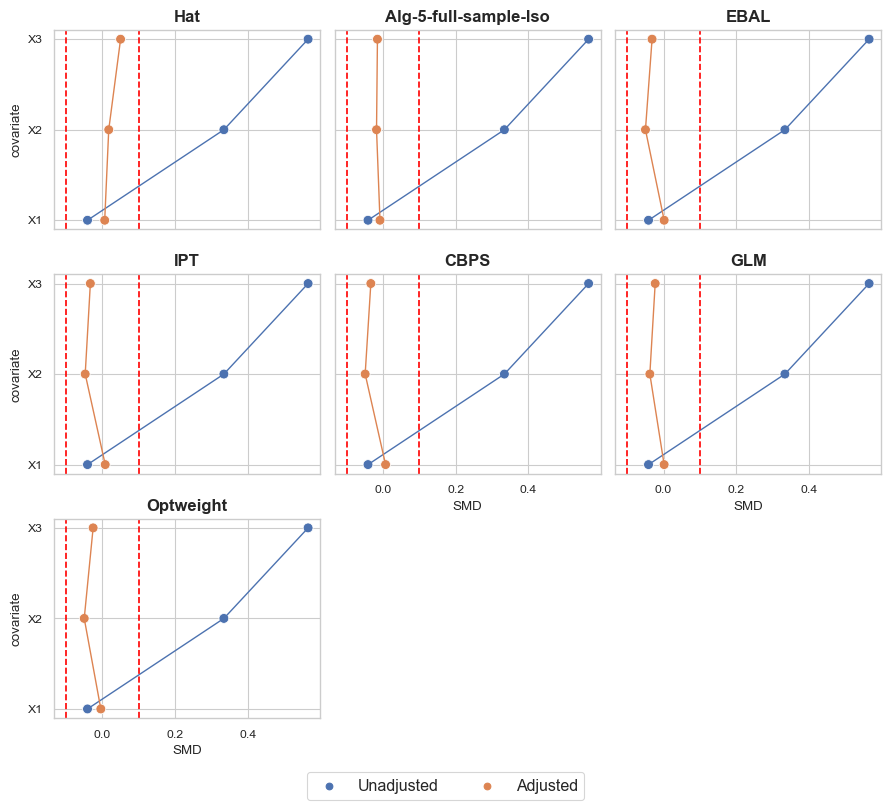

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define covariates
covs = ['X1', 'X2', 'X3']

# Generate SMD data for each method
smd_data = []

weights_list = ["m_hat_ate_weights", 
                "m_calibrated_ate_weights","m_ebal_ate_weights", 
                "m_ipt_ate_weights","m_cbps_ate_weights",
                "m_glm_ate_weights", "m_optweight_ate_weights"] #"m_oracle_ate_weights", 

#weights_list = ["m_oracle_att_weights", "m_hat_att_weights", 
#                "m_calibrated_att_weights","m_ebal_att_weights", 
#                "m_ipt_att_weights","m_cbps_att_weights",
#                "m_glm_att_weights", "m_optweight_att_weights"]

methods = ["Hat", "Alg-5-full-sample-Iso", "EBAL", "IPT", "CBPS", "GLM", "Optweight"] #"Oracle"

for weights, method in zip(weights_list, methods):
    bal_table_train = BalanceTable_2(
        df=df_train,
        cov_cols=covs,
        treatment="D",
        weights=df_train[weights],
        method=method
    )
    smd_data.append(bal_table_train.prepare_smd_data())

# Combine SMD data for plotting
combined_smd_data = pd.concat(smd_data)

# Replace inf values with NaN
combined_smd_data.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.set_theme(style="whitegrid", context="paper")

# Creating the FacetGrid as described
g = sns.FacetGrid(data=combined_smd_data, col='Method', col_wrap=3, sharex=True, sharey=True, margin_titles=True, despine=False)

# Function to plot lines and points
def plot_with_lines(data, **kwargs):
    # Ensure ordering by covariates is correct and line draws in this order
    data = data.sort_values(by='covariate')
    sns.lineplot(data=data, x='SMD', y='covariate', hue='Sample', linewidth=1, legend=None, **kwargs, sort=False)
    sns.scatterplot(data=data, x='SMD', y='covariate', hue='Sample', s=50, legend=True, **kwargs)
    # Add threshold lines for SMD
    plt.axvline(x=0.1, linestyle='--', color='red')
    plt.axvline(x=-0.1, linestyle='--', color='red')

g.map_dataframe(plot_with_lines)
g.set_titles(col_template='{col_name}', fontweight='bold', size=12)

# Add a combined legend below the plots
handles, labels = g.axes.flat[0].get_legend_handles_labels()
g.fig.legend(handles, labels, loc='lower center', ncol=2, fontsize='large', frameon=True, bbox_to_anchor=(0.5, 0.1))

# Adjust layout to prevent legend overlap
plt.subplots_adjust(bottom=0.2)
plt.show()

c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


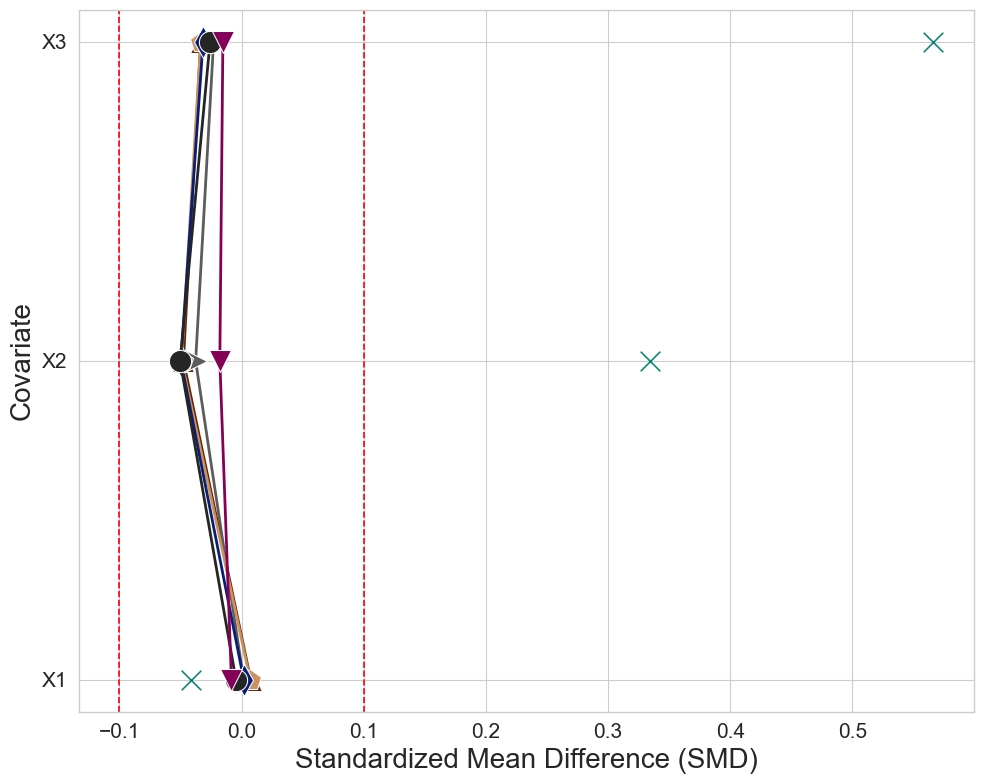

In [90]:
# Define covariates
covs = ['X1', 'X2', 'X3']

# Generate SMD data for each method
smd_data = []

weights_list = [
    "m_calibrated_ate_weights", "m_ebal_ate_weights",
    "m_ipt_ate_weights", "m_cbps_ate_weights",
    "m_glm_ate_weights", "m_optweight_ate_weights"]

methods = ["Alg-5-full-sample-Iso", "EBAL", "IPT", "CBPS", "GLM", "Optweight"]

for weights, method in zip(weights_list, methods):
    bal_table_train = BalanceTable_2(
        df=df_train,
        cov_cols=covs,
        treatment="D",
        weights=df_train[weights],
        method=method
    )
    smd_data.append(bal_table_train.prepare_smd_data())

# Combine SMD data for plotting
combined_smd_data = pd.concat(smd_data)

# Replace inf values with NaN
combined_smd_data.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.set_theme(style="whitegrid", context="paper")

# Method for which you want to highlight the 'Unadjusted' sample
method_to_highlight = 'Alg-5-full-sample-Iso'

plt.figure(figsize=(10, 8))

# Sort data by 'covariate' to ensure lines connect logically
combined_smd_data = combined_smd_data.sort_values(by='covariate')

# Marker styles need to be consistent; using filled markers for all methods
marker_dict = {
    'Optweight': 'o',
    'EBAL': 'd',
    'IPT': '^',
    'Alg-5-full-sample-Iso': 'v',
    'GLM': '>',
    'CBPS': 'p',

}
['p','o','d','^','v','>']

color_dict = {
    'Optweight': '#252525',
    'EBAL': '#091e75',
    'IPT': '#662506',
    'Alg-5-full-sample-Iso': '#850157',
    'GLM': '#5c5c5c',
    'CBPS': '#ca9161'
}

palette_colors = ["#252525", "#091e75", "#662506", "#850157","#5c5c5c","#ca9161"]


# Plot for all methods with only 'Adjusted' samples
sns.lineplot(
    data=combined_smd_data[combined_smd_data['Sample'] == 'Adjusted'],
    x='SMD',
    y='covariate',
    hue='Method',
    style='Method',
    sort= True,
    orient='y',
    markers=marker_dict,
    dashes=False,
    linewidth=2,
    palette=color_dict,
    legend=False 
    )

# Plot 'Unadjusted' samples for the specific method
unadjusted_data = combined_smd_data[
    (combined_smd_data['Method'] == method_to_highlight) & 
    (combined_smd_data['Sample'] == 'Unadjusted')
]

sns.scatterplot(
    data=unadjusted_data,
    x='SMD',
    y='covariate',
    color='#018571',
    marker='x',
    s=200,  # Increased size of the markers for unadjusted data
    label=f'Alg-1-uncalib',
    legend=False
)

# Increasing the marker size for the plot
for line in plt.gca().lines:
    line.set_markersize(16) 


# Add threshold lines for SMD
plt.axvline(x=0.1, linestyle='--', color='red')
plt.axvline(x=-0.1, linestyle='--', color='red')

sns.set_theme(style="whitegrid", context="notebook", rc={"axes.labelsize": 20, 
                                                         "axes.titlesize": 20,
                                                         #"legend.fontsize": 20,
                                                         "xtick.labelsize": 20,
                                                         "ytick.labelsize": 20})

plt.xlabel('Standardized Mean Difference (SMD)', fontweight='medium', fontsize=20)
plt.ylabel('Covariate', fontweight='medium', fontsize=20)

for label in plt.gca().get_xticklabels():
    label.set_fontsize(15)  # Set x-axis tick labels font size
    label.set_fontweight('medium')

for label in plt.gca().get_yticklabels():
    label.set_fontsize(15)  # Set x-axis tick labels font size
    label.set_fontweight('medium')

#legend = plt.legend(title='Method', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3, fontsize= 20)
#legend.get_title().set_fontweight('bold')
#legend.get_title().set_fontsize(20)

plt.tight_layout()
clipping_threshold = 0.01
share_treated = 0.00
overlap = 0.01
n_obs=2000
dim_x = 3
R2_d = 0.00

directory= 'results/figures_drug/paper_cov_balance'
filename = (
f"n_obs_{n_obs:05d}_dim_x_{dim_x:03d}_"
f"clip_{clipping_threshold:.2f}_"
f"R2d_{R2_d:.2f}_overlap_{overlap:.2f}_"
f"share_treated_{share_treated:.2f}.pdf"
)
os.makedirs(directory, exist_ok=True)

plt.savefig(os.path.join(directory, filename), bbox_inches='tight')
plt.show()
plt.clf()

In [91]:
covs = ["X1", "X2", "X3", "Y"]

bal_table_train = BalanceTable(
    df=df_train,
    cov_cols=covs,
    treatment="D",
    weights=df_train["m_calibrated_ate_weights"],
)

bal_table_test = BalanceTable(
    df=df_test,
    cov_cols=covs,
    treatment="D",
    weights=df_test["m_calibrated_ate_weights"],
)

print(bal_table_train)
print(bal_table_test)

Effective Sample Size:
            Control  Treated
Unadjusted   380.00   620.00
Adjusted     312.36   583.78

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1   Binary     -0.0206   -0.0042
1        X2  Contin.      0.3314   -0.0178
2        X3  Contin.      0.5390   -0.0153
3         Y  Contin.     -0.4081   -0.6108
Effective Sample Size:
            Control  Treated
Unadjusted   396.00   604.00
Adjusted     278.49   559.72

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1   Binary     -0.0169    0.0127
1        X2  Contin.      0.4239    0.0051
2        X3  Contin.      0.5813   -0.0616
3         Y  Contin.     -0.1823   -0.3996


c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


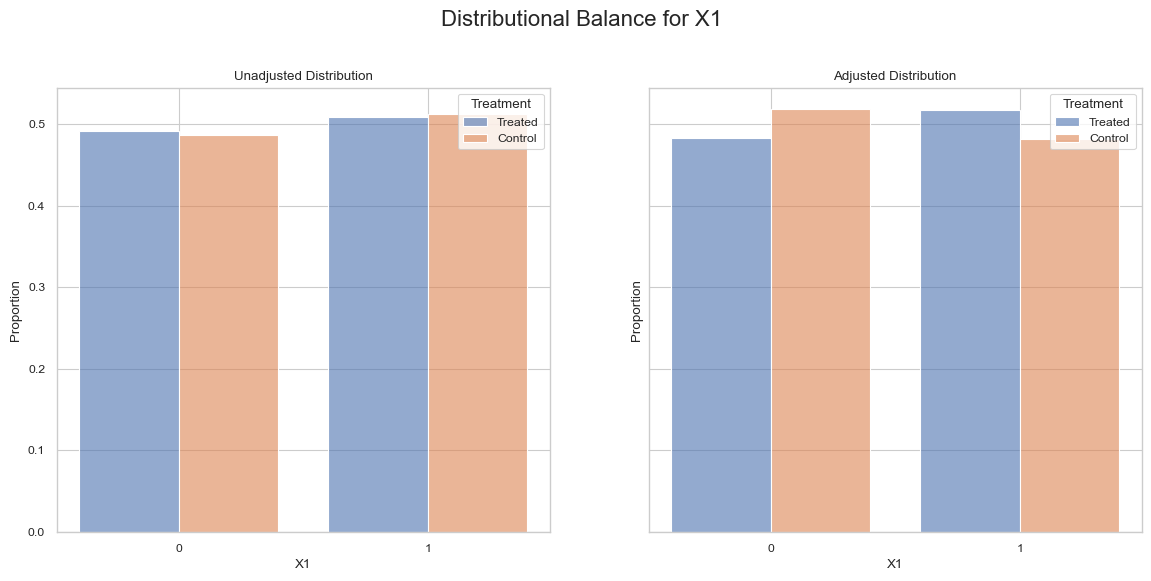

In [22]:
g = bal_table_test.balance_plot(covariate="X1")
plt.show()

c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


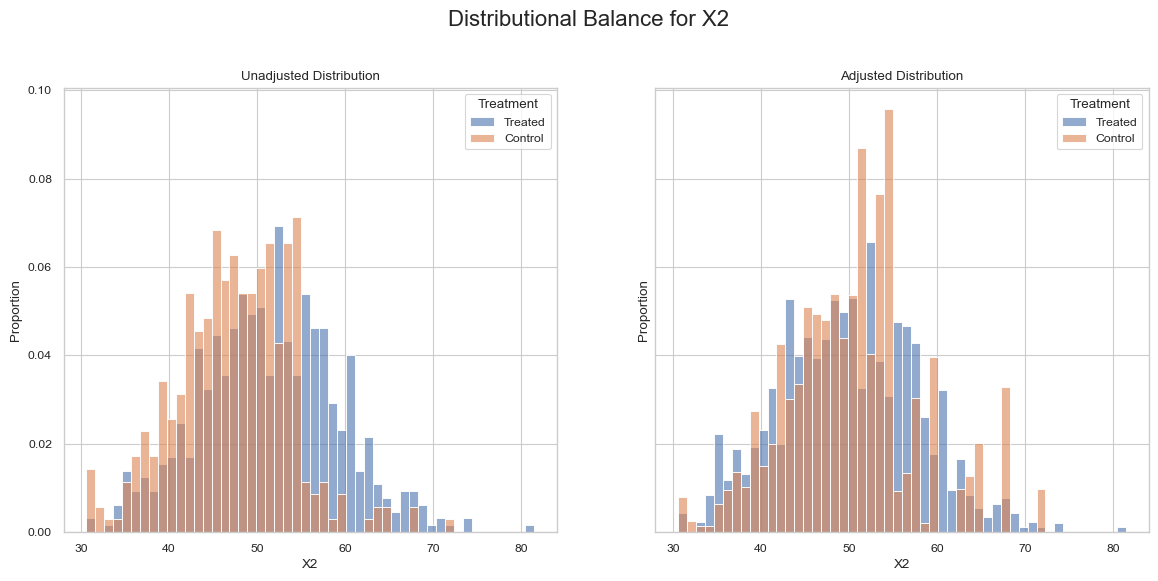

In [23]:
g = bal_table_test.balance_plot(covariate="X2", n_bins=50)
plt.show()

c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\Users\janra\miniforge-pypy3\envs\prop_calib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


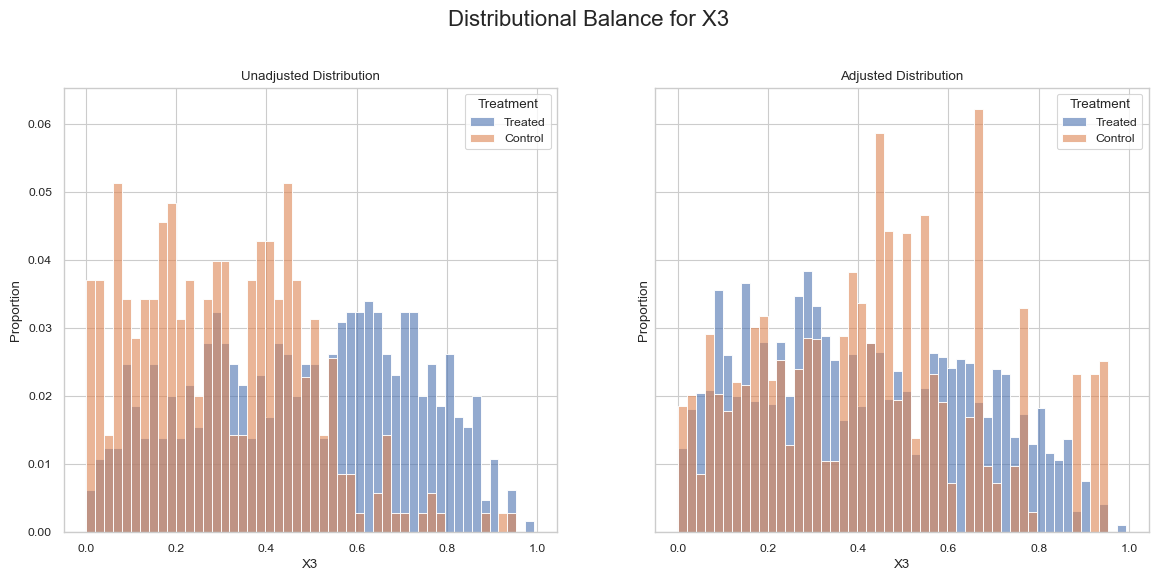

In [24]:
g = bal_table_test.balance_plot(covariate="X3", n_bins=50)
plt.show()

### Fit the ATE estimators

In [92]:
data_fit = pd.concat([df_train, df_test], axis=0)

In [93]:
data_fit.columns

Index(['X1', 'X2', 'X3', 'D', 'Y', 'm_oracle', 'm_glm_ate', 'm_glm_att',
       'm_glm_ate_weights', 'm_glm_att_weights', 'm_optweight_ate',
       'm_optweight_att', 'm_optweight_ate_weights', 'm_optweight_att_weights',
       'm_ebal_ate', 'm_ebal_att', 'm_ebal_ate_weights', 'm_ebal_att_weights',
       'm_ipt_ate', 'm_ipt_att', 'm_ipt_ate_weights', 'm_ipt_att_weights',
       'm_cbps_ate', 'm_cbps_att', 'm_cbps_ate_weights', 'm_cbps_att_weights',
       'm_hat', 'm_calibrated', 'm_oracle_ate_weights', 'm_oracle_att_weights',
       'm_hat_ate_weights', 'm_hat_att_weights', 'm_calibrated_ate_weights',
       'm_calibrated_att_weights', 'm_ipt_ate_ate_weights',
       'm_ipt_ate_att_weights', 'm_ebal_ate_ate_weights',
       'm_ebal_ate_att_weights', 'm_glm_ate_ate_weights',
       'm_glm_ate_att_weights', 'm_cbps_ate_ate_weights',
       'm_cbps_ate_att_weights', 'm_optweight_ate_ate_weights',
       'm_optweight_ate_att_weights'],
      dtype='object')

In [95]:
import os
import sys
from pathlib import Path
from pathlib import Path
# Get the project root directory
project_root = (
    Path.cwd()
    .parents[0]
)
sys.path.append(str(project_root))
import numpy as np  #type:ignore
import pandas as pd #type:ignore
import warnings
import time
from sklearn.linear_model import (LassoCV, LogisticRegressionCV, LinearRegression,  #type:ignore
                                  LogisticRegression)
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor) #type:ignore
from lightgbm import LGBMClassifier, LGBMRegressor #type:ignore
import doubleml as dml
sys.path.append(str(project_root))
sys.path.append(str(f'{project_root}/run-simulation/py-files'))
from utils_calibration import calibrate_propensity_score, compute_ipw_estimate, calibration_errors
from utils_dgps import dgp_wrapper

import statsmodels.api as sm
import statsmodels.formula.api as smf

def extract_xy_from_title(title):
    # Function to extract "xy" from a format such as "m_xy_zdf"
    # and capitalize the first letter
    xy_part = title.split('_')[1]
    return xy_part.capitalize()


import os

# Set environment variables for R 4.4.2
os.environ['R_HOME'] = 'C:\\Program Files\\R\\R-4.1.0'  # Update to the new R version path
os.environ['PATH'] = os.environ['R_HOME'] + '\\bin\\x64;' + os.environ['PATH']

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr, isinstalled, importr

In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.isotonic import IsotonicRegression
import os
# Set environment variables
os.environ['R_HOME'] = 'C:\\Program Files\\R\\R-4.3.0' 
os.environ['PATH'] = os.environ['R_HOME'] + '\\bin\\x64;' + os.environ['PATH']
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
#from rpy2.robjects.packages import importr, isinstalled,

# Set environment variables for R
os.environ['R_HOME'] = 'C:\\Program Files\\R\\R-4.3.0'  # Replace with your actual R installation path
os.environ['PATH'] = os.environ['R_HOME'] + '\\bin\\x64;' + os.environ['PATH']


# Activate pandas2ri conversion
pandas2ri.activate()


clipping_threshold = 0.01
np.random.seed(42)

weightit_pkg = importr('WeightIt')


In [97]:
n_obs_list = [2000] # 200, 1000
dim_x = 3
theta = -1

#overlaps = [0.1, 0.5, 0.9]
overlaps = [0.5]

# this are the defaults, but here we set them explicitly
n_folds = 5
score = "ATE"

dgp_type = 'sim_v06_drug'

# calibration methods
clipping_thresholds = [0.01]

calib_methods = [
    ('alg-1-uncalibrated', 'uncalibrated'),
    ('alg-3-cross-fitted-calib', 'isotonic'),
    ('alg-3-cross-fitted-calib', 'platt'),
    ('alg-5-full-sample-calib', 'platt'),
    ('alg-5-full-sample-calib', 'isotonic'),
    ('alg-5-full-sample-calib', 'platt'),
    ('oracle', 'uncalibrated'),
]

# this are the defaults, but here we set them explicitly
n_folds = 5
score = "ATE"

learner_dict_g = {
    'Linear': LinearRegression(),
    #'RF': RandomForestRegressor(),
    #'LGBM': LGBMRegressor(verbose=-1),
    #'LGBM_overfit': LGBMRegressor(n_estimators=5000,verbose=-1),
    #'BART': SklearnModel(n_burn=50, n_chains=2, n_jobs=-1, n_samples=50, n_trees=20,store_in_sample_predictions=False)
    }

learner_dict_m = {
    'Logit': LogisticRegression(),
    'RF': RandomForestClassifier(),
    #'LGBM': LGBMClassifier(verbose=-1),
    #'LGBM_overfit': LGBMClassifier(n_estimators=5000,verbose=-1)
    }

In [98]:
def estimate_irm(data, theta, learner_g, learner_m, n_folds, score, clipping_thresholds, calib_methods, m_0):
    n_calib_methods = len(calib_methods)
    n_clipping_thresholds = len(clipping_thresholds)
    # set up result arrays
    coefs = np.full(shape=(n_calib_methods, n_clipping_thresholds), fill_value=np.nan)
    bias = np.full(shape=(n_calib_methods, n_clipping_thresholds), fill_value=np.nan)
    ses = np.full_like(coefs, fill_value=np.nan)
    cover = np.full_like(coefs, fill_value=np.nan)
    ci_length = np.full_like(coefs, fill_value=np.nan)
    name_calib_method = np.full_like(coefs, fill_value="not specified", dtype=object)
    name_method = np.full_like(coefs, fill_value="not specified", dtype=object)

    # set up the DoubleMLIRM models
    dml_irm = dml.DoubleMLIRM(data,
                            ml_g=learner_g,
                            ml_m=learner_m,
                            score=score,
                            n_folds=n_folds,
                            trimming_threshold=1e-12) # we set the clipping threshold to a very small value to avoid any clipping
    # fit standard model without calibration and save predictions
    dml_irm.fit(n_jobs_cv=5)
    smpls = dml_irm.smpls[0] # only a single repetition & same sample split as in the main model
    dml_irm_ext = dml.DoubleMLIRM(data,
                                ml_g=dml.utils.DMLDummyRegressor(),
                                ml_m=dml.utils.DMLDummyClassifier(),
                                score=score,
                                n_folds=n_folds,
                                trimming_threshold=1e-12)

    # name elements for readability
    prop_score = dml_irm.predictions["ml_m"][:, :, 0].squeeze()
    treatment = data.d
    outcome = data.y
    covariates = data.x
    for i_clipping_threshold, clipping_threshold in enumerate(clipping_thresholds):

        # re-fit model with calibration
        for i_calib_method, (method, calib_method) in enumerate(calib_methods):
            calib_prop_score = calibrate_propensity_score(
                method=method,
                covariates=covariates,
                propensity_score=prop_score, 
                treatment=treatment, 
                learner_m=learner_m,
                calib_method=calib_method,
                clipping_threshold=clipping_threshold,
                smpls=smpls,
                true_propensity_score=m_0)

            # fit irm model with external predictions
            pred_dict_irm_calib = {"d": {
                "ml_g0": dml_irm.predictions["ml_g0"][:, :, 0],
                "ml_g1": dml_irm.predictions["ml_g1"][:, :, 0],
                "ml_m": calib_prop_score.reshape(-1, 1),
                }
            }
            dml_irm_ext.fit(external_predictions=pred_dict_irm_calib)

            coefs[i_calib_method, i_clipping_threshold] = dml_irm_ext.coef[0]
            ses[i_calib_method, i_clipping_threshold] = dml_irm_ext.se[0]
            confint_calib = dml_irm_ext.confint()
            cover[i_calib_method, i_clipping_threshold] = (confint_calib.loc['d', '2.5 %'] < theta) & (theta < confint_calib.loc['d', '97.5 %'])
            ci_length[i_calib_method, i_clipping_threshold]  = confint_calib.loc['d', '97.5 %'] - confint_calib.loc['d', '2.5 %']
            name_method[i_calib_method, i_clipping_threshold] = method
            name_calib_method[i_calib_method, i_clipping_threshold] = calib_method
                        # store n-unique propensity scores

    results_dict = {
        "coefs": coefs,
        "ses": ses,
        "cover": cover,
        "ci_length": ci_length,
        "method": name_method,
        "calib_method": name_calib_method,
        "theta": theta}
    return results_dict

In [99]:
def estimate_weighted_ate(data, i_rep, overlap, n_obs, clipping_threshold = 1e-12):

    formula = robjects.Formula('D ~ X1 + X2 + X3')

    for method in ['glm', 'optweight', 'ebal', 'ipt','cbps']:

        data_r = pandas2ri.py2rpy(data)
        weightit_ate = robjects.r['weightit'](formula, data=data_r, estimand="ATE", method=method)
        weightit_att = robjects.r['weightit'](formula, data=data_r, estimand="ATT", method=method)

        weights_ate = weightit_ate.rx2('weights')
        weights_att = weightit_att.rx2('weights')

        # Calculate the propensity scores based on weights and treatment assignment
        propensity_scores = data['D'] / weights_ate + (1 - data['D'])*(1-1/(weights_ate))
        data[f'm_{method}_ate'] = propensity_scores.clip(clipping_threshold, 1.0 - clipping_threshold)
        propensity_scores = (weights_att - data['D']) / ((1-data['D']) + (weights_att-data['D'])) 
        data[f'm_{method}_att'] = propensity_scores.clip(clipping_threshold, 1.0 - clipping_threshold)

        data[f'm_{method}_ate_weights'] = weights_ate
        data[f'm_{method}_att_weights'] = weights_att

    # Step 6: Split the data into training and testing sets
    covariates = ['X1', 'X2', 'X3']
    df_train, df_test = train_test_split(data, test_size=0.5, random_state=42)

    # Step 7: Fit a Logistic Regression to estimate the propensity scores
    model = LogisticRegression(random_state=42)
    model.fit(df_train[covariates], df_train['D'])
    #weights_cobalt = []

    for df in [df_train, df_test]:
        df['m_hat'] = model.predict_proba(df[covariates])[:, 1]
        calibrator = IsotonicRegression(out_of_bounds='clip', y_min=0, y_max=1)
        df['m_calibrated'] = calibrator.fit_transform(df['m_hat'], df['D'])


    for df in [df_train, df_test]:
        for ps in ['m_oracle', 'm_hat', 'm_calibrated']:
            ps_clipped = df[ps].clip(clipping_threshold, 1.0 - clipping_threshold)

            df[f'{ps}_ate_weights'] = df['D'] / ps_clipped + (1 - df['D']) / (1 - ps_clipped)

            df[f'{ps}_att_weights'] = df['D'] + (1 - df['D']) * ps_clipped / (1 - ps_clipped)
    
    data_fit = pd.concat([df_train, df_test], axis=0)
    
    # Define the formula for your model
    formula = 'Y ~ D * (X1 + X2 + X3)'

    # Identify all ATE weight columns in your DataFrame
    weight_columns = [col for col in data_fit.columns if col.endswith('ate_weights')]

    # Initialize an empty list to store the results as dictionaries
    ate_results_list = []

    # Estimate Weighted Least Squares

    for weight_col in weight_columns:
        # Fit the weighted least squares model with the current ATE weights
        
        # Assuming data_fit["D"] is a Pandas Series
        d = data_fit["D"].values.reshape(-1, 1)
        y = data_fit["Y"].values

        # Add a constant to this reshaped array
        d = sm.add_constant(d)
        d = pd.DataFrame(data=d, columns=["const", "treatment"])
        mod_wls = sm.WLS(y, d, weights=data_fit[weight_col])
        weighted_model = mod_wls.fit()

        # Print the summary of the model
        #print(f"Model summary for weights: {weight_col}")
        #print(weighted_model.summary())
        
        # Extract the coefficient of D, its standard error, and confidence interval
        #weighted_model = smf.wls(formula, data=data_fit, weights=data_fit[weight_col]).fit()
        ate_coefficient = weighted_model.params['treatment']
        ate_se = weighted_model.bse['treatment']
        conf_int = weighted_model.conf_int().loc['treatment']  # Confidence interval for D
        conf_int_lower, conf_int_upper = conf_int[0], conf_int[1]
        ci_length = conf_int_upper - conf_int_lower
        theta = -1
        
        # Determine if the treatment effect = -1 falls within the confidence interval
        coverage = conf_int_lower <= theta <= conf_int_upper
        
        method = extract_xy_from_title(weight_col.replace('_weights', ''))

        # Append the result to the list
        ate_results_list.append({
            'method': method,
            'coefs': ate_coefficient,
            'ses': ate_se,
            'ci_length': ci_length,
            'cover': coverage,
            "calib_method": "weighted",
            "learner_g": 'Linear',
            "learner_m": 'Logit',
            "n_obs": n_obs,
            "clipping_threshold": clipping_threshold,
            "repetition": i_rep,
            "theta": theta,
            "overlap": overlap
        })

    # Convert the list of dictionaries to a DataFrame
    ate_results = pd.DataFrame(ate_results_list)
    return ate_results    

In [100]:
def estimate_weighted_ate(data, i_rep, overlap, n_obs, clipping_threshold=1e-12):
    formula = robjects.Formula('D ~ X1 + X2 + X3')

    for method in ['glm', 'optweight', 'ebal', 'ipt', 'cbps']:
        data_r = pandas2ri.py2rpy(data)
        weightit_ate = robjects.r['weightit'](formula, data=data_r, estimand="ATE", method=method)
        weightit_att = robjects.r['weightit'](formula, data=data_r, estimand="ATT", method=method)

        weights_ate = weightit_ate.rx2('weights')
        weights_att = weightit_att.rx2('weights')

        # Calculate the propensity scores based on weights and treatment assignment
        propensity_scores_ate = data['D'] / weights_ate + (1 - data['D']) * (1 - 1 / weights_ate)
        data[f'm_{method}_ate'] = propensity_scores_ate.clip(clipping_threshold, 1.0 - clipping_threshold)
        
        # Calculate normalizing constants for ATE
        treated_nc_ate = np.mean(data['D'] / propensity_scores_ate)
        control_nc_ate = np.mean((1 - data['D']) / (1 - propensity_scores_ate))

        propensity_scores_att = (weights_att - data['D']) / ((1 - data['D']) + (weights_att - data['D']))
        data[f'm_{method}_att'] = propensity_scores_att.clip(clipping_threshold, 1.0 - clipping_threshold)

        # Calculate normalizing constants for ATT
        treated_nc_att = np.mean(data['D'] / propensity_scores_att)
        control_nc_att = np.mean((1 - data['D']) / (1 - propensity_scores_att))

        data[f'm_{method}_ate_weights'] = weights_ate
        data[f'm_{method}_att_weights'] = weights_att

    covariates = ['X1', 'X2', 'X3']
    df_train, df_test = train_test_split(data, test_size=0.5, random_state=42)

    model = LogisticRegression(random_state=42)
    model.fit(df_train[covariates], df_train['D'])

    for df in [df_train, df_test]:
        df['m_hat'] = model.predict_proba(df[covariates])[:, 1]
        calibrator = IsotonicRegression(out_of_bounds='clip', y_min=0, y_max=1)
        df['m_calibrated'] = calibrator.fit_transform(df['m_hat'], df['D'])

    for df in [df_train, df_test]:
        for ps in ['m_oracle', 'm_hat', 'm_calibrated']:
            ps_clipped = df[ps].clip(clipping_threshold, 1.0 - clipping_threshold)

            df[f'{ps}_ate_weights'] = df['D'] / ps_clipped + (1 - df['D']) / (1 - ps_clipped)
            df[f'{ps}_att_weights'] = df['D'] + (1 - df['D']) * ps_clipped / (1 - ps_clipped)

    data_fit = pd.concat([df_train, df_test], axis=0)

    formula = 'Y ~ D * (X1 + X2 + X3)'
    weight_columns = [col for col in data_fit.columns if col.endswith('ate_weights')]

    ate_results_list = []

    for weight_col in weight_columns:
        d = data_fit["D"].values.reshape(-1, 1)
        y = data_fit["Y"].values

        d = sm.add_constant(d)
        d = pd.DataFrame(data=d, columns=["const", "treatment"])
        mod_wls = sm.WLS(y, d, weights=data_fit[weight_col])
        weighted_model = mod_wls.fit()

        ate_coefficient = weighted_model.params['treatment']
        ate_se = weighted_model.bse['treatment']
        conf_int = weighted_model.conf_int().loc['treatment']
        conf_int_lower, conf_int_upper = conf_int[0], conf_int[1]
        ci_length = conf_int_upper - conf_int_lower
        theta = -1
        coverage = conf_int_lower <= theta <= conf_int_upper

        method = extract_xy_from_title(weight_col.replace('_weights', ''))

        ate_results_list.append({
            'method': method,
            'coefs': ate_coefficient,
            'ses': ate_se,
            'ci_length': ci_length,
            'cover': coverage,
            "treated_normalizing_constant_ate": treated_nc_ate,
            "control_normalizing_constant_ate": control_nc_ate,
            "calib_method": "weighted",
            "learner_g": 'Linear',
            "learner_m": 'Logit',
            "n_obs": n_obs,
            "clipping_threshold": clipping_threshold,
            "repetition": i_rep,
            "theta": theta,
            "overlap": overlap
        })

    ate_results = pd.DataFrame(ate_results_list)
    return ate_results

In [101]:
def estimate_irm(data, theta, learner_g, learner_m, n_folds, score, clipping_thresholds, calib_methods, m_0):
    n_calib_methods = len(calib_methods)
    n_clipping_thresholds = len(clipping_thresholds)
    # set up result arrays
    coefs = np.full(shape=(n_calib_methods, n_clipping_thresholds), fill_value=np.nan)
    ses = np.full_like(coefs, fill_value=np.nan)
    cover = np.full_like(coefs, fill_value=np.nan)
    ci_length = np.full_like(coefs, fill_value=np.nan)
    name_calib_method = np.full_like(coefs, fill_value="not specified", dtype=object)
    name_method = np.full_like(coefs, fill_value="not specified", dtype=object)
    treated_nc = np.full_like(coefs, fill_value=np.nan)
    control_nc = np.full_like(coefs, fill_value=np.nan)

    # set up the DoubleMLIRM models
    dml_irm = dml.DoubleMLIRM(data,
                              ml_g=learner_g,
                              ml_m=learner_m,
                              score=score,
                              n_folds=n_folds,
                              trimming_threshold=1e-12)  # Avoid too much clipping
    # fit model without calibration and save predictions
    dml_irm.fit(n_jobs_cv=5)
    smpls = dml_irm.smpls[0]
    dml_irm_ext = dml.DoubleMLIRM(data,
                                  ml_g=dml.utils.DMLDummyRegressor(),
                                  ml_m=dml.utils.DMLDummyClassifier(),
                                  score=score,
                                  n_folds=n_folds,
                                  trimming_threshold=1e-12)

    # Extract initial data
    prop_score = dml_irm.predictions["ml_m"][:, :, 0].squeeze()
    treatment = data.d
    covariates = data.x

    for i_clipping_threshold, clipping_threshold in enumerate(clipping_thresholds):

        # Refit model with calibration
        for i_calib_method, (method, calib_method) in enumerate(calib_methods):
            calib_prop_score = calibrate_propensity_score(
                method=method,
                covariates=covariates,
                propensity_score=prop_score,
                treatment=treatment,
                learner_m=learner_m,
                calib_method=calib_method,
                clipping_threshold=clipping_threshold,
                smpls=smpls,
                true_propensity_score=m_0)

            # Calculate normalizing constants for treated and control groups
            treated_nc[i_calib_method, i_clipping_threshold] = np.mean(treatment / calib_prop_score)
            control_nc[i_calib_method, i_clipping_threshold] = np.mean((1 - treatment) / (1 - calib_prop_score))

            # Fit model with external predictions
            pred_dict_irm_calib = {
                "d": {
                    "ml_g0": dml_irm.predictions["ml_g0"][:, :, 0],
                    "ml_g1": dml_irm.predictions["ml_g1"][:, :, 0],
                    "ml_m": calib_prop_score.reshape(-1, 1),
                }
            }
            dml_irm_ext.fit(external_predictions=pred_dict_irm_calib)

            coefs[i_calib_method, i_clipping_threshold] = dml_irm_ext.coef[0]
            ses[i_calib_method, i_clipping_threshold] = dml_irm_ext.se[0]
            confint_calib = dml_irm_ext.confint()
            cover[i_calib_method, i_clipping_threshold] = (
                confint_calib.loc['d', '2.5 %'] < theta) & (theta < confint_calib.loc['d', '97.5 %'])
            ci_length[i_calib_method, i_clipping_threshold] = (
                confint_calib.loc['d', '97.5 %'] - confint_calib.loc['d', '2.5 %'])
            name_method[i_calib_method, i_clipping_threshold] = method
            name_calib_method[i_calib_method, i_clipping_threshold] = calib_method

    results_dict = {
        "coefs": coefs,
        "ses": ses,
        "cover": cover,
        "ci_length": ci_length,
        "treated_normalizing_constant_ate": treated_nc,
        "control_normalizing_constant_ate": control_nc,
        "method": name_method,
        "calib_method": name_calib_method,
        "theta": theta,
    }
    return results_dict

In [103]:
# ignore warnings (prop. score is often close to zero or one)
warnings.filterwarnings('ignore')
#empty dataframe
df = pd.DataFrame(columns=["coefs","ses", "cover", "ci_length","treated_normalizing_constant_ate","control_normalizing_constant_ate", "method", "calib_method", 
                           "learner_g", "learner_m", "n_obs", "clipping_threshold", "repetition", 'theta', 'overlap',''])

df_2 = pd.DataFrame(columns=["coefs","ses", "cover", "ci_length","treated_normalizing_constant_ate","control_normalizing_constant_ate", "method", "calib_method", 
                           "learner_g", "learner_m", "n_obs", "clipping_threshold", "repetition", 'theta', 'overlap'])

n_rep=100

for i_rep in range(n_rep):
    print(f'{i_rep} / {n_rep}')
    np.random.seed(42 + i_rep)
    for (i_overlap, overlap) in enumerate(overlaps):
        for (i_n_obs, n_obs) in enumerate(n_obs_list):
            n_obs = int(n_obs)
            i_rep = int(i_rep)            
            # generate data
            dgp_dict = {
                'overlap': overlap,
                'n_obs': n_obs,
            }
            data_dict = dgp_wrapper(dgp_type=dgp_type, **dgp_dict)
            m_0 = data_dict['propensity_score']
            # create DoubleMLData object 
            df_data = pd.DataFrame(data_dict['covariates'], columns=[f'x{i+1}' for i in range(dim_x)])
            df_data['y'] = data_dict['outcome']
            df_data['d'] = data_dict['treatment']
            dml_data = dml.DoubleMLData(df_data, y_col='y', d_cols='d')

            for i_learner_g, (name_learner_g, learner_g) in enumerate(learner_dict_g.items()):
                for i_learner_m, (name_learner_m, learner_m) in enumerate(learner_dict_m.items()):
                    random_state_value = 42 + i_rep
                    if hasattr(learner_m, 'random_state'):
                        learner_m.random_state = random_state_value
                    if hasattr(learner_g, 'random_state'):
                        learner_g.random_state = random_state_value
                    dml_results = estimate_irm(dml_data, theta, learner_g, learner_m, n_folds, score, clipping_thresholds, calib_methods, m_0)
                    for i_clipping_threshold, clipping_threshold in enumerate(clipping_thresholds):
                        # store results
                        df_small = pd.DataFrame({
                            "coefs": dml_results["coefs"][:, i_clipping_threshold],
                            "ses": dml_results["ses"][:, i_clipping_threshold],
                            "cover": dml_results["cover"][:, i_clipping_threshold],
                            "ci_length": dml_results["ci_length"][:, i_clipping_threshold],
                            "treated_normalizing_constant_ate": dml_results["treated_normalizing_constant_ate"][:, i_clipping_threshold],
                            "control_normalizing_constant_ate": dml_results["control_normalizing_constant_ate"][:, i_clipping_threshold],
                            "method": dml_results["method"][:, i_clipping_threshold],
                            "calib_method": dml_results["calib_method"][:, i_clipping_threshold],
                            "learner_g": name_learner_g,
                            "learner_m": name_learner_m,
                            "n_obs": n_obs,
                            "clipping_threshold": clipping_threshold,
                            "repetition": i_rep,
                            "theta": theta,
                            "overlap": overlap
                        })
                        df = pd.concat([df, df_small], ignore_index=True)

                        # Convert data_dict to DataFrame
                        data = pd.DataFrame({
                            'X1': data_dict['covariates'][:,0],
                            'X2': data_dict['covariates'][:,1],
                            'X3': data_dict['covariates'][:,2],
                            'D': data_dict['treatment'],
                            'Y': data_dict['outcome'],
                            'm_oracle': data_dict['propensity_score'],
                        })

                        df_small_2 = estimate_weighted_ate(data, i_rep, overlap, n_obs, clipping_threshold)
                        df_2 = pd.concat([df_2, df_small_2], ignore_index=True)


0 / 100
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100


R[write to console]: Warning:
R[write to console]:  The optimziation failed to converge; try again with a higher value of
`maxit`.

R[write to console]: Warning:
R[write to console]:  The optimziation failed to converge; try again with a higher value of
`maxit`.



40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100


In [35]:
df_small_2

,method,coefs,ses,ci_length,cover,treated_normalizing_constant_ate,control_normalizing_constant_ate,calib_method,learner_g,learner_m,n_obs,clipping_threshold,repetition,theta,overlap
0,Glm,-1.152761,0.097216,0.381311,True,0.999036,0.999036,weighted,Linear,Logit,2000,1.000000e-12,99,-1,0.5
1,Optweight,-1.113340,0.097337,0.381787,True,0.999036,0.999036,weighted,Linear,Logit,2000,1.000000e-12,99,-1,0.5
2,Ebal,-1.126115,0.097636,0.382959,True,0.999036,0.999036,weighted,Linear,Logit,2000,1.000000e-12,99,-1,0.5
3,Ipt,-1.135344,0.097066,0.380723,True,0.999036,0.999036,weighted,Linear,Logit,2000,1.000000e-12,99,-1,0.5
4,Cbps,-1.134517,0.097128,0.380967,True,0.999036,0.999036,weighted,Linear,Logit,2000,1.000000e-12,99,-1,0.5
5,Oracle,-1.029281,0.096422,0.378195,True,0.999036,0.999036,weighted,Linear,Logit,2000,1.000000e-12,99,-1,0.5
6,Hat,-1.130948,0.096896,0.380056,True,0.999036,0.999036,weighted,Linear,Logit,2000,1.000000e-12,99,-1,0.5
7,Calibrated,-1.130576,0.096691,0.379251,True,0.999036,0.999036,weighted,Linear,Logit,2000,1.000000e-12,99,-1,0.5


In [36]:
def print_normalizing_constants(propensity_score, d):
  print(f"Treated: {np.mean(d / propensity_score)}")
  print(f"Control: {np.mean((1 - d) / (1- propensity_score))}")

In [37]:
combined_results = pd.concat([df, df_2], ignore_index=True, axis=0)

method_mapping = {
    "Calibrated": "Alg-5-full-sample",
    "Hat": "Alg-1-uncalib",
    "alg-1-uncalibrated": "Alg-1-uncalib",	
    "alg-3-cross-fitted-calib": "Alg-3-cf",
    "alg-5-full-sample-calib": "Alg-5-full-sample",
    "oracle": "Oracle"
}

combined_results["method"] = combined_results["method"].replace(method_mapping)


In [38]:
combined_results.tail()

,coefs,ses,cover,ci_length,treated_normalizing_constant_ate,control_normalizing_constant_ate,method,calib_method,learner_g,learner_m,n_obs,clipping_threshold,repetition,theta,overlap,
2995,-1.135344,0.097066,True,0.380723,0.999036,0.999036,Ipt,weighted,Linear,Logit,2000,1.000000e-12,99,-1,0.5,NaN
2996,-1.134517,0.097128,True,0.380967,0.999036,0.999036,Cbps,weighted,Linear,Logit,2000,1.000000e-12,99,-1,0.5,NaN
2997,-1.029281,0.096422,True,0.378195,0.999036,0.999036,Oracle,weighted,Linear,Logit,2000,1.000000e-12,99,-1,0.5,NaN
2998,-1.130948,0.096896,True,0.380056,0.999036,0.999036,Alg-1-uncalib,weighted,Linear,Logit,2000,1.000000e-12,99,-1,0.5,NaN
2999,-1.130576,0.096691,True,0.379251,0.999036,0.999036,Alg-5-full-sample,weighted,Linear,Logit,2000,1.000000e-12,99,-1,0.5,NaN


In [39]:
import numpy as np
import pandas as pd
import scipy.stats

def evaluate_estimation(ate: np.ndarray, theta: float, level: float = 0.9) -> dict:
    # Calculate bias
    bias = ate - theta
    
    # Return estimation metrics
    return {
        'RMSE': np.sqrt(np.nanmean((ate - theta) ** 2)),
        'Std. dev.': np.nanstd(ate),
        'MAE': np.nanmean(np.abs(bias)),
    }

def calculate_statistics(results_df: pd.DataFrame, theta: float) -> pd.DataFrame:
    # Group by the specified combination of columns
    grouped = results_df.groupby(['method', 'calib_method', 'learner_g', 'learner_m', 'n_obs', 'clipping_threshold', 'overlap'])
    
    summary_list = []
    
    for group_key, group in grouped:
        # Calculate coverage and confidence interval averages
        avg_coverage = group['cover'].mean()
        avg_ci_length = group['ci_length'].mean()
        treated_normalizing_constant_ate = group['treated_normalizing_constant_ate'].mean()
        control_normalizing_constant_ate = group['control_normalizing_constant_ate'].mean()
        
        # Calculate RMSE, Standard Deviation, and MAE
        estimation_metrics = evaluate_estimation(group['coefs'].values, theta)
        
        # Compile the results
        result = {
            'method': group_key[0],
            'calib_method': group_key[1],
            'learner_g': group_key[2],
            'learner_m': group_key[3],
            'n_obs': group_key[4],
            'clipping_threshold': group_key[5],
            'overlap': group_key[6],
            'avg_coverage': avg_coverage,
            'avg_ci_length': avg_ci_length,
            'treated_normalizing_constant_ate': treated_normalizing_constant_ate,
            'control_normalizing_constant_ate': control_normalizing_constant_ate,
            **estimation_metrics
        }
        
        summary_list.append(result)
    
    # Convert the summary list to a DataFrame
    summary_df = pd.DataFrame(summary_list)
    
    return summary_df


# Calculate the summarized result
theta_true = -1  # Example true ATE
summary_df = calculate_statistics(combined_results, theta_true)

# Print the summary of the results
print(summary_df)

               method  calib_method learner_g learner_m  n_obs  \
0       Alg-1-uncalib  uncalibrated    Linear     Logit   2000   
1       Alg-1-uncalib  uncalibrated    Linear        RF   2000   
2       Alg-1-uncalib      weighted    Linear     Logit   2000   
3            Alg-3-cf      isotonic    Linear     Logit   2000   
4            Alg-3-cf      isotonic    Linear        RF   2000   
5            Alg-3-cf         platt    Linear     Logit   2000   
6            Alg-3-cf         platt    Linear        RF   2000   
7   Alg-5-full-sample      isotonic    Linear     Logit   2000   
8   Alg-5-full-sample      isotonic    Linear        RF   2000   
9   Alg-5-full-sample         platt    Linear     Logit   2000   
10  Alg-5-full-sample         platt    Linear        RF   2000   
11  Alg-5-full-sample      weighted    Linear     Logit   2000   
12               Cbps      weighted    Linear     Logit   2000   
13               Ebal      weighted    Linear     Logit   2000   
14        

In [40]:
summary_df

,method,calib_method,learner_g,learner_m,n_obs,clipping_threshold,overlap,avg_coverage,avg_ci_length,treated_normalizing_constant_ate,control_normalizing_constant_ate,RMSE,Std. dev.,MAE
0,Alg-1-uncalib,uncalibrated,Linear,Logit,2000,1.000000e-12,0.5,0.96,3.968868e-01,1.002764e+00,9.959908e-01,9.395277e-02,9.274945e-02,7.482145e-02
1,Alg-1-uncalib,uncalibrated,Linear,RF,2000,1.000000e-12,0.5,0.98,8.365292e+09,5.000000e+07,2.135047e+09,2.471622e+09,2.464744e+09,1.998628e+09
2,Alg-1-uncalib,weighted,Linear,Logit,2000,1.000000e-12,0.5,0.93,3.706457e-01,1.000271e+00,1.000262e+00,9.770712e-02,9.261213e-02,7.828160e-02
3,Alg-3-cf,isotonic,Linear,Logit,2000,1.000000e-12,0.5,0.96,4.130112e-01,9.964100e-01,9.872100e-01,9.774572e-02,9.691449e-02,7.656918e-02
4,Alg-3-cf,isotonic,Linear,RF,2000,1.000000e-12,0.5,0.96,3.894639e-01,9.971200e-01,9.940150e-01,9.565685e-02,9.447216e-02,7.518916e-02
5,Alg-3-cf,platt,Linear,Logit,2000,1.000000e-12,0.5,0.96,3.884706e-01,1.002812e+00,9.842910e-01,9.399149e-02,9.298708e-02,7.475881e-02
6,Alg-3-cf,platt,Linear,RF,2000,1.000000e-12,0.5,0.94,3.576396e-01,9.835159e-01,9.608312e-01,9.239197e-02,9.106184e-02,7.243116e-02
7,Alg-5-full-sample,isotonic,Linear,Logit,2000,1.000000e-12,0.5,0.97,4.043453e-01,9.993800e-01,9.977700e-01,9.659331e-02,9.533724e-02,7.656193e-02
8,Alg-5-full-sample,isotonic,Linear,RF,2000,1.000000e-12,0.5,0.94,3.856284e-01,9.995150e-01,1.000000e+00,9.526324e-02,9.379669e-02,7.462152e-02
9,Alg-5-full-sample,platt,Linear,Logit,2000,1.000000e-12,0.5,0.96,3.969723e-01,1.003149e+00,9.962103e-01,9.373324e-02,9.253783e-02,7.464441e-02


### Mixed Results, g = Linear

In [41]:
# Sort by 'n_obs'
sorted_data = summary_df.sort_values(by=['overlap','method','calib_method',])

# Select only the relevant columns for the LaTeX table
table_data = sorted_data[['method', 'calib_method','learner_m', 'avg_coverage', 'avg_ci_length',
                          'treated_normalizing_constant_ate','control_normalizing_constant_ate', 'RMSE', 'Std. dev.', 'MAE']]


# Optionally, round the numerical columns for better readability
table_data = table_data.round({'overlap': 1, 'avg_coverage': 2, 'avg_ci_length': 3,'treated_normalizing_constant_ate': 3, 
                               'control_normalizing_constant_ate': 3,'RMSE': 3, 'Std. dev.': 3, 'MAE': 3})

table_data = table_data.rename(columns={'method': 'Method','calib_method': 'Calibration Method', 'learner_m': 'Learner m', 'avg_coverage': 'Avg. Coverage',
                            'avg_ci_length': 'Avg. CI Length', 'treated_normalizing_constant_ate': 'Treated Normalizing Constant ATE',
                            'control_normalizing_constant_ate': 'Control Normalizing Constant ATE'})

# Generate the LaTeX table
latex_table = table_data.to_latex(index=False, 
                                  caption="Summary of Method Results", 
                                  label="tab:method_results",
                                  float_format="%.3f")

# Print the LaTeX table code
print(latex_table)

\begin{table}
\caption{Summary of Method Results}
\label{tab:method_results}
\begin{tabular}{lllrrrrrrr}
\toprule
Method & Calibration Method & Learner m & Avg. Coverage & Avg. CI Length & Treated Normalizing Constant ATE & Control Normalizing Constant ATE & RMSE & Std. dev. & MAE \\
\midrule
Alg-1-uncalib & uncalibrated & Logit & 0.960 & 0.397 & 1.003 & 0.996 & 0.094 & 0.093 & 0.075 \\
Alg-1-uncalib & uncalibrated & RF & 0.980 & 8365291716.668 & 50000001.283 & 2135047232.792 & 2471621600.727 & 2464743662.173 & 1998628180.079 \\
Alg-1-uncalib & weighted & Logit & 0.930 & 0.371 & 1.000 & 1.000 & 0.098 & 0.093 & 0.078 \\
Alg-3-cf & isotonic & Logit & 0.960 & 0.413 & 0.996 & 0.987 & 0.098 & 0.097 & 0.077 \\
Alg-3-cf & isotonic & RF & 0.960 & 0.389 & 0.997 & 0.994 & 0.096 & 0.094 & 0.075 \\
Alg-3-cf & platt & Logit & 0.960 & 0.388 & 1.003 & 0.984 & 0.094 & 0.093 & 0.075 \\
Alg-3-cf & platt & RF & 0.940 & 0.358 & 0.984 & 0.961 & 0.092 & 0.091 & 0.072 \\
Alg-5-full-sample & isotonic & Logit 

### Random Forest results

In [32]:
# Sort by 'n_obs'
sorted_data = summary_df.sort_values(by=['overlap','n_obs','calib_method','method'])

# Select only the relevant columns for the LaTeX table
table_data = sorted_data[['method', 'calib_method', 'overlap', 'n_obs', 'avg_coverage', 'avg_ci_length', 'RMSE', 'Std. dev.', 'MAE']]


# Optionally, round the numerical columns for better readability
table_data = table_data.round({'overlap': 1, 'avg_coverage': 2, 'avg_ci_length': 3, 'RMSE': 3, 'Std. dev.': 3, 'MAE': 3})

# Generate the LaTeX table
latex_table = table_data.to_latex(index=False, 
                                  caption="Summary of Method Results", 
                                  label="tab:method_results",
                                  float_format="%.3f")

# Print the LaTeX table code
print(latex_table)

\begin{table}
\caption{Summary of Method Results}
\label{tab:method_results}
\begin{tabular}{llrrrrrrr}
\toprule
method & calib_method & overlap & n_obs & avg_coverage & avg_ci_length & RMSE & Std. dev. & MAE \\
\midrule
Alg-5-full-sample & isotonic & 0.100 & 2000 & 0.920 & 0.482 & 0.138 & 0.137 & 0.109 \\
Alg-1-uncalib & uncalibrated & 0.100 & 2000 & 0.950 & 16232859281.357 & 4268938504.526 & 4227253809.533 & 3391174963.222 \\
Oracle & uncalibrated & 0.100 & 2000 & 0.950 & 0.573 & 0.136 & 0.136 & 0.104 \\
Alg-1-uncalib & weighted & 0.100 & 2000 & 0.890 & 0.370 & 0.118 & 0.107 & 0.094 \\
Alg-5-full-sample & weighted & 0.100 & 2000 & 0.880 & 0.371 & 0.117 & 0.117 & 0.092 \\
Cbps & weighted & 0.100 & 2000 & 0.890 & 0.371 & 0.110 & 0.109 & 0.088 \\
Ebal & weighted & 0.100 & 2000 & 0.930 & 0.385 & 0.109 & 0.109 & 0.088 \\
Glm & weighted & 0.100 & 2000 & 0.900 & 0.370 & 0.113 & 0.111 & 0.089 \\
Ipt & weighted & 0.100 & 2000 & 0.890 & 0.371 & 0.113 & 0.113 & 0.090 \\
Optweight & weighted & 0

### Logit/ Linear results

In [23]:
# Sort by 'n_obs'
sorted_data = summary_df.sort_values(by=['overlap','n_obs','calib_method','method'])

# Select only the relevant columns for the LaTeX table
table_data = sorted_data[['method', 'calib_method', 'overlap', 'n_obs', 'avg_coverage', 'avg_ci_length', 'RMSE', 'Std. dev.', 'MAE']]


# Optionally, round the numerical columns for better readability
table_data = table_data.round({'overlap': 1, 'avg_coverage': 2, 'avg_ci_length': 3, 'RMSE': 3, 'Std. dev.': 3, 'MAE': 3})

# Generate the LaTeX table
latex_table = table_data.to_latex(index=False, 
                                  caption="Summary of Method Results", 
                                  label="tab:method_results",
                                  float_format="%.3f")

# Print the LaTeX table code
print(latex_table)

\begin{table}
\caption{Summary of Method Results}
\label{tab:method_results}
\begin{tabular}{llrrrrrrr}
\toprule
method & calib_method & overlap & n_obs & avg_coverage & avg_ci_length & RMSE & Std. dev. & MAE \\
\midrule
Alg-5-full-sample & isotonic & 0.100 & 2000 & 0.950 & 0.477 & 0.113 & 0.112 & 0.091 \\
Alg-1-uncalib & uncalibrated & 0.100 & 2000 & 0.950 & 0.448 & 0.112 & 0.111 & 0.090 \\
Oracle & uncalibrated & 0.100 & 2000 & 0.940 & 0.529 & 0.131 & 0.130 & 0.101 \\
Alg-1-uncalib & weighted & 0.100 & 2000 & 0.890 & 0.370 & 0.118 & 0.107 & 0.094 \\
Alg-5-full-sample & weighted & 0.100 & 2000 & 0.880 & 0.371 & 0.117 & 0.117 & 0.092 \\
Cbps & weighted & 0.100 & 2000 & 0.890 & 0.371 & 0.110 & 0.109 & 0.088 \\
Ebal & weighted & 0.100 & 2000 & 0.930 & 0.385 & 0.109 & 0.109 & 0.088 \\
Glm & weighted & 0.100 & 2000 & 0.900 & 0.370 & 0.113 & 0.111 & 0.089 \\
Ipt & weighted & 0.100 & 2000 & 0.890 & 0.371 & 0.113 & 0.113 & 0.090 \\
Optweight & weighted & 0.100 & 2000 & 0.930 & 0.384 & 0.106 &